In [1]:
import sys 
print(sys.executable)

import pandas as pd 
import numpy as np 

/mnt/c/users/gdgun/COMP4447/Final_Project/venv_4447_project/bin/python3.12


# Read in first table from US Census - 'Employment Status'

In [2]:
df_emp = pd.read_excel("Employment_Status_ACSST5Y2022.S2301.xlsx", sheet_name="Data")

In [3]:
print(df_emp.head())

                     Unnamed: 0  \
0                           NaN   
1                         Label   
2  Population 16 years and over   
3                           AGE   
4                16 to 19 years   

  Census Tract 1.01; Suffolk County; Massachusetts       Unnamed: 2  \
0                                            Total              NaN   
1                                         Estimate  Margin of Error   
2                                            1,532             ±309   
3                                              NaN              NaN   
4                                               37              ±55   

                       Unnamed: 3       Unnamed: 4  \
0  Labor Force Participation Rate              NaN   
1                        Estimate  Margin of Error   
2                           69.0%             ±8.7   
3                             NaN              NaN   
4                            0.0%            ±55.8   

                    Unnamed: 5       

In [4]:
df_emp.to_csv("Employment_Status_ACSST5Y2022.csv", index=False)
df_emp.head()

,Unnamed: 0,Census Tract 1.01; Suffolk County; Massachusetts,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Census Tract 1.02; Suffolk County; Massachusetts,...,Unnamed: 1871,Unnamed: 1872,Census Tract 9901.01; Suffolk County; Massachusetts,Unnamed: 1874,Unnamed: 1875,Unnamed: 1876,Unnamed: 1877,Unnamed: 1878,Unnamed: 1879,Unnamed: 1880
0,NaN,Total,NaN,Labor Force Participation Rate,NaN,Employment/Population Ratio,NaN,Unemployment rate,NaN,Total,...,Unemployment rate,NaN,Total,NaN,Labor Force Participation Rate,NaN,Employment/Population Ratio,NaN,Unemployment rate,NaN
1,Label,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,...,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error
2,Population 16 years and over,"1,532",±309,69.0%,±8.7,65.5%,±7.6,5.0%,±4.2,"3,637",...,-,**,0,±14,-,**,-,**,-,**
3,AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16 to 19 years,37,±55,0.0%,±55.8,0.0%,±55.8,-,**,305,...,-,**,0,±14,-,**,-,**,-,**


In [5]:
# transpose the data to change features to columns and put tracts as rows
# delate the 'Unnamed: 0' column to prevent a transpose issue that was encountered
df_emp.rename(columns={'Unnamed: 0': ''}, inplace=True)
df_emp = df_emp.T
df_emp.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
,NaN,Label,Population 16 years and over,AGE,16 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 44 years,45 to 54 years,...,Below poverty level,At or above the poverty level,DISABILITY STATUS,With any disability,EDUCATIONAL ATTAINMENT,Population 25 to 64 years,Less than high school graduate,High school graduate (includes equivalency),Some college or associate's degree,Bachelor's degree or higher
Census Tract 1.01; Suffolk County; Massachusetts,Total,Estimate,"1,532",NaN,37,333,461,149,265,149,...,196,"1,206",NaN,47,NaN,"1,069",4,66,121,878
Unnamed: 2,NaN,Margin of Error,±309,NaN,±55,±144,±164,±72,±136,±94,...,±103,±285,NaN,±42,NaN,±236,±7,±58,±57,±216
Unnamed: 3,Labor Force Participation Rate,Estimate,69.0%,NaN,0.0%,77.8%,70.3%,81.9%,66.4%,87.2%,...,32.1%,81.8%,NaN,83.0%,NaN,74.0%,100.0%,72.7%,97.5%,70.7%
Unnamed: 4,NaN,Margin of Error,±8.7,NaN,±55.8,±16.3,±17.5,±20.5,±19.0,±17.0,...,±23.8,±8.7,NaN,±25.9,NaN,±9.0,±100.0,±23.1,±7.4,±10.6


In [6]:
# set row 1 to column names and drop row 1
df_emp.columns = df_emp.iloc[0]
df_emp.drop(index="", inplace=True)
df_emp.head()

,NaN,Label,Population 16 years and over,AGE,16 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 44 years,45 to 54 years,...,Below poverty level,At or above the poverty level,DISABILITY STATUS,With any disability,EDUCATIONAL ATTAINMENT,Population 25 to 64 years,Less than high school graduate,High school graduate (includes equivalency),Some college or associate's degree,Bachelor's degree or higher
Census Tract 1.01; Suffolk County; Massachusetts,Total,Estimate,"1,532",NaN,37,333,461,149,265,149,...,196,"1,206",NaN,47,NaN,"1,069",4,66,121,878
Unnamed: 2,NaN,Margin of Error,±309,NaN,±55,±144,±164,±72,±136,±94,...,±103,±285,NaN,±42,NaN,±236,±7,±58,±57,±216
Unnamed: 3,Labor Force Participation Rate,Estimate,69.0%,NaN,0.0%,77.8%,70.3%,81.9%,66.4%,87.2%,...,32.1%,81.8%,NaN,83.0%,NaN,74.0%,100.0%,72.7%,97.5%,70.7%
Unnamed: 4,NaN,Margin of Error,±8.7,NaN,±55.8,±16.3,±17.5,±20.5,±19.0,±17.0,...,±23.8,±8.7,NaN,±25.9,NaN,±9.0,±100.0,±23.1,±7.4,±10.6
Unnamed: 5,Employment/Population Ratio,Estimate,65.5%,NaN,0.0%,72.1%,67.9%,81.9%,61.5%,80.5%,...,15.8%,80.1%,NaN,83.0%,NaN,70.8%,100.0%,36.4%,89.3%,70.7%


In [7]:
# make indices the first column to preserve tract data and re-set
df_emp['Tract'] = df_emp.index
df_emp.insert(0, 'Tract', df_emp.pop('Tract')) # place tract in first column
df_emp.reset_index(drop=True, inplace=True) # reset indices 
df_emp.rename_axis("Index", inplace=True)
df_emp.head()

,Tract,NaN,Label,Population 16 years and over,AGE,16 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 44 years,...,Below poverty level,At or above the poverty level,DISABILITY STATUS,With any disability,EDUCATIONAL ATTAINMENT,Population 25 to 64 years,Less than high school graduate,High school graduate (includes equivalency),Some college or associate's degree,Bachelor's degree or higher
Index,,,,,,,,,,,,,,,,,,,,,
0,Census Tract 1.01; Suffolk County; Massachusetts,Total,Estimate,"1,532",NaN,37,333,461,149,265,...,196,"1,206",NaN,47,NaN,"1,069",4,66,121,878
1,Unnamed: 2,NaN,Margin of Error,±309,NaN,±55,±144,±164,±72,±136,...,±103,±285,NaN,±42,NaN,±236,±7,±58,±57,±216
2,Unnamed: 3,Labor Force Participation Rate,Estimate,69.0%,NaN,0.0%,77.8%,70.3%,81.9%,66.4%,...,32.1%,81.8%,NaN,83.0%,NaN,74.0%,100.0%,72.7%,97.5%,70.7%
3,Unnamed: 4,NaN,Margin of Error,±8.7,NaN,±55.8,±16.3,±17.5,±20.5,±19.0,...,±23.8,±8.7,NaN,±25.9,NaN,±9.0,±100.0,±23.1,±7.4,±10.6
4,Unnamed: 5,Employment/Population Ratio,Estimate,65.5%,NaN,0.0%,72.1%,67.9%,81.9%,61.5%,...,15.8%,80.1%,NaN,83.0%,NaN,70.8%,100.0%,36.4%,89.3%,70.7%


In [8]:
df_emp.head(15)

# drop margin of error rows 
moe_rows = df_emp[df_emp['Label']=="Margin of Error"].index
print(moe_rows)
df_emp.drop(moe_rows, inplace=True)
df_emp.reset_index(drop=True, inplace=True)
df_emp.head(15)

Index([   1,    3,    5,    7,    9,   11,   13,   15,   17,   19,
       ...
       1861, 1863, 1865, 1867, 1869, 1871, 1873, 1875, 1877, 1879],
      dtype='int64', name='Index', length=940)


,Tract,NaN,Label,Population 16 years and over,AGE,16 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 44 years,...,Below poverty level,At or above the poverty level,DISABILITY STATUS,With any disability,EDUCATIONAL ATTAINMENT,Population 25 to 64 years,Less than high school graduate,High school graduate (includes equivalency),Some college or associate's degree,Bachelor's degree or higher
0,Census Tract 1.01; Suffolk County; Massachusetts,Total,Estimate,"1,532",NaN,37,333,461,149,265,...,196,"1,206",NaN,47,NaN,"1,069",4,66,121,878
1,Unnamed: 3,Labor Force Participation Rate,Estimate,69.0%,NaN,0.0%,77.8%,70.3%,81.9%,66.4%,...,32.1%,81.8%,NaN,83.0%,NaN,74.0%,100.0%,72.7%,97.5%,70.7%
2,Unnamed: 5,Employment/Population Ratio,Estimate,65.5%,NaN,0.0%,72.1%,67.9%,81.9%,61.5%,...,15.8%,80.1%,NaN,83.0%,NaN,70.8%,100.0%,36.4%,89.3%,70.7%
3,Unnamed: 7,Unemployment rate,Estimate,5.0%,NaN,-,7.3%,3.4%,0.0%,7.4%,...,50.8%,2.1%,NaN,0.0%,NaN,4.3%,0.0%,50.0%,8.5%,0.0%
4,Census Tract 1.02; Suffolk County; Massachusetts,Total,Estimate,"3,637",NaN,305,325,931,584,354,...,622,"2,270",NaN,274,NaN,"2,568",308,301,336,"1,623"
5,Unnamed: 11,Labor Force Participation Rate,Estimate,73.6%,NaN,33.4%,73.5%,89.7%,98.1%,86.2%,...,70.1%,90.9%,NaN,54.7%,NaN,88.0%,56.2%,95.0%,85.7%,93.3%
6,Unnamed: 13,Employment/Population Ratio,Estimate,70.9%,NaN,33.4%,62.8%,89.7%,95.5%,79.1%,...,60.1%,89.4%,NaN,38.7%,NaN,85.6%,51.9%,82.7%,82.1%,93.3%
7,Unnamed: 15,Unemployment rate,Estimate,3.6%,NaN,0.0%,14.6%,0.0%,2.6%,8.2%,...,14.2%,1.7%,NaN,29.3%,NaN,2.7%,7.5%,12.9%,4.2%,0.0%
8,Census Tract 2.01; Suffolk County; Massachusetts,Total,Estimate,"3,673",NaN,34,270,"1,069",590,847,...,359,"2,857",NaN,104,NaN,"2,947",298,199,452,"1,998"
9,Unnamed: 19,Labor Force Participation Rate,Estimate,85.0%,NaN,79.4%,95.9%,93.3%,83.7%,90.0%,...,54.3%,94.4%,NaN,68.3%,NaN,89.3%,78.9%,87.4%,92.0%,90.5%


In [9]:
df_emp.rename(columns={np.nan: 'Metric'}, inplace=True)
df_emp.drop('Label', axis=1, inplace=True)
df_emp.head(15)

,Tract,Metric,Population 16 years and over,AGE,16 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 44 years,45 to 54 years,...,Below poverty level,At or above the poverty level,DISABILITY STATUS,With any disability,EDUCATIONAL ATTAINMENT,Population 25 to 64 years,Less than high school graduate,High school graduate (includes equivalency),Some college or associate's degree,Bachelor's degree or higher
0,Census Tract 1.01; Suffolk County; Massachusetts,Total,"1,532",NaN,37,333,461,149,265,149,...,196,"1,206",NaN,47,NaN,"1,069",4,66,121,878
1,Unnamed: 3,Labor Force Participation Rate,69.0%,NaN,0.0%,77.8%,70.3%,81.9%,66.4%,87.2%,...,32.1%,81.8%,NaN,83.0%,NaN,74.0%,100.0%,72.7%,97.5%,70.7%
2,Unnamed: 5,Employment/Population Ratio,65.5%,NaN,0.0%,72.1%,67.9%,81.9%,61.5%,80.5%,...,15.8%,80.1%,NaN,83.0%,NaN,70.8%,100.0%,36.4%,89.3%,70.7%
3,Unnamed: 7,Unemployment rate,5.0%,NaN,-,7.3%,3.4%,0.0%,7.4%,7.7%,...,50.8%,2.1%,NaN,0.0%,NaN,4.3%,0.0%,50.0%,8.5%,0.0%
4,Census Tract 1.02; Suffolk County; Massachusetts,Total,"3,637",NaN,305,325,931,584,354,534,...,622,"2,270",NaN,274,NaN,"2,568",308,301,336,"1,623"
5,Unnamed: 11,Labor Force Participation Rate,73.6%,NaN,33.4%,73.5%,89.7%,98.1%,86.2%,80.7%,...,70.1%,90.9%,NaN,54.7%,NaN,88.0%,56.2%,95.0%,85.7%,93.3%
6,Unnamed: 13,Employment/Population Ratio,70.9%,NaN,33.4%,62.8%,89.7%,95.5%,79.1%,78.3%,...,60.1%,89.4%,NaN,38.7%,NaN,85.6%,51.9%,82.7%,82.1%,93.3%
7,Unnamed: 15,Unemployment rate,3.6%,NaN,0.0%,14.6%,0.0%,2.6%,8.2%,3.0%,...,14.2%,1.7%,NaN,29.3%,NaN,2.7%,7.5%,12.9%,4.2%,0.0%
8,Census Tract 2.01; Suffolk County; Massachusetts,Total,"3,673",NaN,34,270,"1,069",590,847,240,...,359,"2,857",NaN,104,NaN,"2,947",298,199,452,"1,998"
9,Unnamed: 19,Labor Force Participation Rate,85.0%,NaN,79.4%,95.9%,93.3%,83.7%,90.0%,94.6%,...,54.3%,94.4%,NaN,68.3%,NaN,89.3%,78.9%,87.4%,92.0%,90.5%


In [10]:
# replace 'Unnamed' values in Tract column with NaN
unnamed_tract = df_emp['Tract'].str.contains('^Unnamed')
df_emp['Tract'] = np.where(unnamed_tract, np.nan, df_emp['Tract'])

# fill in null values with the correct tract 
df_emp['Tract'].fillna(method='ffill', inplace=True)
df_emp.head(15)

/tmp/ipykernel_17613/1035759018.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_emp['Tract'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_17613/1035759018.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_emp['Tract'].fillna(method='ffill', inplace=True)


,Tract,Metric,Population 16 years and over,AGE,16 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 44 years,45 to 54 years,...,Below poverty level,At or above the poverty level,DISABILITY STATUS,With any disability,EDUCATIONAL ATTAINMENT,Population 25 to 64 years,Less than high school graduate,High school graduate (includes equivalency),Some college or associate's degree,Bachelor's degree or higher
0,Census Tract 1.01; Suffolk County; Massachusetts,Total,"1,532",NaN,37,333,461,149,265,149,...,196,"1,206",NaN,47,NaN,"1,069",4,66,121,878
1,Census Tract 1.01; Suffolk County; Massachusetts,Labor Force Participation Rate,69.0%,NaN,0.0%,77.8%,70.3%,81.9%,66.4%,87.2%,...,32.1%,81.8%,NaN,83.0%,NaN,74.0%,100.0%,72.7%,97.5%,70.7%
2,Census Tract 1.01; Suffolk County; Massachusetts,Employment/Population Ratio,65.5%,NaN,0.0%,72.1%,67.9%,81.9%,61.5%,80.5%,...,15.8%,80.1%,NaN,83.0%,NaN,70.8%,100.0%,36.4%,89.3%,70.7%
3,Census Tract 1.01; Suffolk County; Massachusetts,Unemployment rate,5.0%,NaN,-,7.3%,3.4%,0.0%,7.4%,7.7%,...,50.8%,2.1%,NaN,0.0%,NaN,4.3%,0.0%,50.0%,8.5%,0.0%
4,Census Tract 1.02; Suffolk County; Massachusetts,Total,"3,637",NaN,305,325,931,584,354,534,...,622,"2,270",NaN,274,NaN,"2,568",308,301,336,"1,623"
5,Census Tract 1.02; Suffolk County; Massachusetts,Labor Force Participation Rate,73.6%,NaN,33.4%,73.5%,89.7%,98.1%,86.2%,80.7%,...,70.1%,90.9%,NaN,54.7%,NaN,88.0%,56.2%,95.0%,85.7%,93.3%
6,Census Tract 1.02; Suffolk County; Massachusetts,Employment/Population Ratio,70.9%,NaN,33.4%,62.8%,89.7%,95.5%,79.1%,78.3%,...,60.1%,89.4%,NaN,38.7%,NaN,85.6%,51.9%,82.7%,82.1%,93.3%
7,Census Tract 1.02; Suffolk County; Massachusetts,Unemployment rate,3.6%,NaN,0.0%,14.6%,0.0%,2.6%,8.2%,3.0%,...,14.2%,1.7%,NaN,29.3%,NaN,2.7%,7.5%,12.9%,4.2%,0.0%
8,Census Tract 2.01; Suffolk County; Massachusetts,Total,"3,673",NaN,34,270,"1,069",590,847,240,...,359,"2,857",NaN,104,NaN,"2,947",298,199,452,"1,998"
9,Census Tract 2.01; Suffolk County; Massachusetts,Labor Force Participation Rate,85.0%,NaN,79.4%,95.9%,93.3%,83.7%,90.0%,94.6%,...,54.3%,94.4%,NaN,68.3%,NaN,89.3%,78.9%,87.4%,92.0%,90.5%


In [11]:
# remove words from Tract values to only keep the Tract number (for later merging)
remove_words = r'Census Tract |; Suffolk County; Massachusetts'
df_emp['Tract'] = df_emp['Tract'].str.replace(remove_words, '', regex=True)
df_emp.head(15)

,Tract,Metric,Population 16 years and over,AGE,16 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 44 years,45 to 54 years,...,Below poverty level,At or above the poverty level,DISABILITY STATUS,With any disability,EDUCATIONAL ATTAINMENT,Population 25 to 64 years,Less than high school graduate,High school graduate (includes equivalency),Some college or associate's degree,Bachelor's degree or higher
0,1.01,Total,"1,532",NaN,37,333,461,149,265,149,...,196,"1,206",NaN,47,NaN,"1,069",4,66,121,878
1,1.01,Labor Force Participation Rate,69.0%,NaN,0.0%,77.8%,70.3%,81.9%,66.4%,87.2%,...,32.1%,81.8%,NaN,83.0%,NaN,74.0%,100.0%,72.7%,97.5%,70.7%
2,1.01,Employment/Population Ratio,65.5%,NaN,0.0%,72.1%,67.9%,81.9%,61.5%,80.5%,...,15.8%,80.1%,NaN,83.0%,NaN,70.8%,100.0%,36.4%,89.3%,70.7%
3,1.01,Unemployment rate,5.0%,NaN,-,7.3%,3.4%,0.0%,7.4%,7.7%,...,50.8%,2.1%,NaN,0.0%,NaN,4.3%,0.0%,50.0%,8.5%,0.0%
4,1.02,Total,"3,637",NaN,305,325,931,584,354,534,...,622,"2,270",NaN,274,NaN,"2,568",308,301,336,"1,623"
5,1.02,Labor Force Participation Rate,73.6%,NaN,33.4%,73.5%,89.7%,98.1%,86.2%,80.7%,...,70.1%,90.9%,NaN,54.7%,NaN,88.0%,56.2%,95.0%,85.7%,93.3%
6,1.02,Employment/Population Ratio,70.9%,NaN,33.4%,62.8%,89.7%,95.5%,79.1%,78.3%,...,60.1%,89.4%,NaN,38.7%,NaN,85.6%,51.9%,82.7%,82.1%,93.3%
7,1.02,Unemployment rate,3.6%,NaN,0.0%,14.6%,0.0%,2.6%,8.2%,3.0%,...,14.2%,1.7%,NaN,29.3%,NaN,2.7%,7.5%,12.9%,4.2%,0.0%
8,2.01,Total,"3,673",NaN,34,270,"1,069",590,847,240,...,359,"2,857",NaN,104,NaN,"2,947",298,199,452,"1,998"
9,2.01,Labor Force Participation Rate,85.0%,NaN,79.4%,95.9%,93.3%,83.7%,90.0%,94.6%,...,54.3%,94.4%,NaN,68.3%,NaN,89.3%,78.9%,87.4%,92.0%,90.5%


In [12]:
pd.set_option('display.max_columns', None)
df_emp.head()

,Tract,Metric,Population 16 years and over,AGE,16 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 years and over,RACE AND HISPANIC OR LATINO ORIGIN,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Hispanic or Latino origin (of any race),"White alone, not Hispanic or Latino",Population 20 to 64 years,SEX,Male,Female,With own children under 18 years,With own children under 6 years only,With own children under 6 years and 6 to 17 years,With own children 6 to 17 years only,POVERTY STATUS IN THE PAST 12 MONTHS,Below poverty level,At or above the poverty level,DISABILITY STATUS,With any disability,EDUCATIONAL ATTAINMENT,Population 25 to 64 years,Less than high school graduate,High school graduate (includes equivalency),Some college or associate's degree,Bachelor's degree or higher
0,1.01,Total,"1,532",NaN,37,333,461,149,265,149,35,10,52,41,NaN,"1,031",89,0,352,0,26,34,92,"1,028","1,402",NaN,678,724,96,3,7,86,NaN,196,"1,206",NaN,47,NaN,"1,069",4,66,121,878
1,1.01,Labor Force Participation Rate,69.0%,NaN,0.0%,77.8%,70.3%,81.9%,66.4%,87.2%,97.1%,50.0%,13.5%,0.0%,NaN,73.4%,74.2%,-,53.7%,-,69.2%,79.4%,91.3%,73.3%,74.9%,NaN,68.6%,80.8%,96.9%,100.0%,57.1%,100.0%,NaN,32.1%,81.8%,NaN,83.0%,NaN,74.0%,100.0%,72.7%,97.5%,70.7%
2,1.01,Employment/Population Ratio,65.5%,NaN,0.0%,72.1%,67.9%,81.9%,61.5%,80.5%,97.1%,50.0%,13.5%,0.0%,NaN,68.6%,74.2%,-,52.8%,-,69.2%,79.4%,91.3%,68.5%,71.1%,NaN,62.7%,79.0%,96.9%,100.0%,57.1%,100.0%,NaN,15.8%,80.1%,NaN,83.0%,NaN,70.8%,100.0%,36.4%,89.3%,70.7%
3,1.01,Unemployment rate,5.0%,NaN,-,7.3%,3.4%,0.0%,7.4%,7.7%,0.0%,0.0%,0.0%,-,NaN,6.6%,0.0%,-,1.6%,-,0.0%,0.0%,0.0%,6.6%,5.0%,NaN,8.6%,2.2%,0.0%,0.0%,0.0%,0.0%,NaN,50.8%,2.1%,NaN,0.0%,NaN,4.3%,0.0%,50.0%,8.5%,0.0%
4,1.02,Total,"3,637",NaN,305,325,931,584,354,534,51,114,283,156,NaN,"1,875",398,11,791,0,509,53,539,"1,812","2,893",NaN,"1,107","1,786",290,26,51,213,NaN,622,"2,270",NaN,274,NaN,"2,568",308,301,336,"1,623"


In [13]:
df_emp.columns

Index(['Tract', 'Metric', 'Population 16 years and over', 'AGE',
       '16 to 19 years', '20 to 24 years', '25 to 29 years', '30 to 34 years',
       '35 to 44 years', '45 to 54 years', '55 to 59 years', '60 to 64 years',
       '65 to 74 years', '75 years and over',
       'RACE AND HISPANIC OR LATINO ORIGIN', 'White alone',
       'Black or African American alone',
       'American Indian and Alaska Native alone', 'Asian alone',
       'Native Hawaiian and Other Pacific Islander alone',
       'Some other race alone', 'Two or more races',
       'Hispanic or Latino origin (of any race)',
       'White alone, not Hispanic or Latino', 'Population 20 to 64 years',
       'SEX', 'Male', 'Female', 'With own children under 18 years',
       'With own children under 6 years only',
       'With own children under 6 years and 6 to 17  years',
       'With own children 6 to 17 years only',
       'POVERTY STATUS IN THE PAST 12 MONTHS', 'Below poverty level',
       'At or above the poverty le

In [14]:
df_emp.columns
df_emp.head()

,Tract,Metric,Population 16 years and over,AGE,16 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 years and over,RACE AND HISPANIC OR LATINO ORIGIN,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Hispanic or Latino origin (of any race),"White alone, not Hispanic or Latino",Population 20 to 64 years,SEX,Male,Female,With own children under 18 years,With own children under 6 years only,With own children under 6 years and 6 to 17 years,With own children 6 to 17 years only,POVERTY STATUS IN THE PAST 12 MONTHS,Below poverty level,At or above the poverty level,DISABILITY STATUS,With any disability,EDUCATIONAL ATTAINMENT,Population 25 to 64 years,Less than high school graduate,High school graduate (includes equivalency),Some college or associate's degree,Bachelor's degree or higher
0,1.01,Total,"1,532",NaN,37,333,461,149,265,149,35,10,52,41,NaN,"1,031",89,0,352,0,26,34,92,"1,028","1,402",NaN,678,724,96,3,7,86,NaN,196,"1,206",NaN,47,NaN,"1,069",4,66,121,878
1,1.01,Labor Force Participation Rate,69.0%,NaN,0.0%,77.8%,70.3%,81.9%,66.4%,87.2%,97.1%,50.0%,13.5%,0.0%,NaN,73.4%,74.2%,-,53.7%,-,69.2%,79.4%,91.3%,73.3%,74.9%,NaN,68.6%,80.8%,96.9%,100.0%,57.1%,100.0%,NaN,32.1%,81.8%,NaN,83.0%,NaN,74.0%,100.0%,72.7%,97.5%,70.7%
2,1.01,Employment/Population Ratio,65.5%,NaN,0.0%,72.1%,67.9%,81.9%,61.5%,80.5%,97.1%,50.0%,13.5%,0.0%,NaN,68.6%,74.2%,-,52.8%,-,69.2%,79.4%,91.3%,68.5%,71.1%,NaN,62.7%,79.0%,96.9%,100.0%,57.1%,100.0%,NaN,15.8%,80.1%,NaN,83.0%,NaN,70.8%,100.0%,36.4%,89.3%,70.7%
3,1.01,Unemployment rate,5.0%,NaN,-,7.3%,3.4%,0.0%,7.4%,7.7%,0.0%,0.0%,0.0%,-,NaN,6.6%,0.0%,-,1.6%,-,0.0%,0.0%,0.0%,6.6%,5.0%,NaN,8.6%,2.2%,0.0%,0.0%,0.0%,0.0%,NaN,50.8%,2.1%,NaN,0.0%,NaN,4.3%,0.0%,50.0%,8.5%,0.0%
4,1.02,Total,"3,637",NaN,305,325,931,584,354,534,51,114,283,156,NaN,"1,875",398,11,791,0,509,53,539,"1,812","2,893",NaN,"1,107","1,786",290,26,51,213,NaN,622,"2,270",NaN,274,NaN,"2,568",308,301,336,"1,623"


In [15]:
df_emp.columns

# drop race and gender columns
df_emp.drop(columns=['AGE',
       '16 to 19 years', '20 to 24 years', '25 to 29 years', '30 to 34 years',
       '35 to 44 years', '45 to 54 years', '55 to 59 years', '60 to 64 years',
       '65 to 74 years', '75 years and over', 'RACE AND HISPANIC OR LATINO ORIGIN', 'White alone',
       'Black or African American alone',
       'American Indian and Alaska Native alone', 'Asian alone',
       'Native Hawaiian and Other Pacific Islander alone',
       'Some other race alone', 'Two or more races',
       'Hispanic or Latino origin (of any race)',
       'White alone, not Hispanic or Latino', 'Population 20 to 64 years',
       'SEX', 'Male', 'Female', 'With own children under 18 years',
       'With own children under 6 years only',
       'With own children under 6 years and 6 to 17  years',
       'With own children 6 to 17 years only', 'POVERTY STATUS IN THE PAST 12 MONTHS', 'DISABILITY STATUS', 
       'EDUCATIONAL ATTAINMENT', 'High school graduate (includes equivalency)', "Some college or associate's degree"], inplace=True)
       
df_emp.columns
df_emp.head(10)

,Tract,Metric,Population 16 years and over,Below poverty level,At or above the poverty level,With any disability,Population 25 to 64 years,Less than high school graduate,Bachelor's degree or higher
0,1.01,Total,"1,532",196,"1,206",47,"1,069",4,878
1,1.01,Labor Force Participation Rate,69.0%,32.1%,81.8%,83.0%,74.0%,100.0%,70.7%
2,1.01,Employment/Population Ratio,65.5%,15.8%,80.1%,83.0%,70.8%,100.0%,70.7%
3,1.01,Unemployment rate,5.0%,50.8%,2.1%,0.0%,4.3%,0.0%,0.0%
4,1.02,Total,"3,637",622,"2,270",274,"2,568",308,"1,623"
5,1.02,Labor Force Participation Rate,73.6%,70.1%,90.9%,54.7%,88.0%,56.2%,93.3%
6,1.02,Employment/Population Ratio,70.9%,60.1%,89.4%,38.7%,85.6%,51.9%,93.3%
7,1.02,Unemployment rate,3.6%,14.2%,1.7%,29.3%,2.7%,7.5%,0.0%
8,2.01,Total,"3,673",359,"2,857",104,"2,947",298,"1,998"
9,2.01,Labor Force Participation Rate,85.0%,54.3%,94.4%,68.3%,89.3%,78.9%,90.5%


In [16]:
df_emp.columns
df_emp.head()


,Tract,Metric,Population 16 years and over,Below poverty level,At or above the poverty level,With any disability,Population 25 to 64 years,Less than high school graduate,Bachelor's degree or higher
0,1.01,Total,"1,532",196,"1,206",47,"1,069",4,878
1,1.01,Labor Force Participation Rate,69.0%,32.1%,81.8%,83.0%,74.0%,100.0%,70.7%
2,1.01,Employment/Population Ratio,65.5%,15.8%,80.1%,83.0%,70.8%,100.0%,70.7%
3,1.01,Unemployment rate,5.0%,50.8%,2.1%,0.0%,4.3%,0.0%,0.0%
4,1.02,Total,"3,637",622,"2,270",274,"2,568",308,"1,623"


In [17]:
# create multi-indexed df
df_emp_multi_indexed = df_emp.set_index(['Tract', 'Metric'])
df_emp_multi_indexed

Population 16 years and over  \
Tract   Metric                                                        
1.01    Total                                                 1,532   
        Labor Force Participation Rate                        69.0%   
        Employment/Population Ratio                           65.5%   
        Unemployment rate                                      5.0%   
1.02    Total                                                 3,637   
...                                                             ...   
9819    Unemployment rate                                         -   
9901.01 Total                                                     0   
        Labor Force Participation Rate                            -   
        Employment/Population Ratio                               -   
        Unemployment rate                                         -   

                                       Below poverty level  \
Tract   Metric                                               
1.01    Total                                          196   
        Labor Force Participation Rate               32.1%   
        Employment/Population Ratio                  15.8%   
        Unemployment rate                            50.8%   
1.02    Total                                          622   
...                                                    ...   
9819    Unemployment rate                                -   
9901.01 Total                                            0   
        Labor Force Participation Rate                   -   
        Employment/Population Ratio                      -   
        Unemployment rate                                -   

                                       At or above the poverty level  \
Tract   Metric                                                         
1.01    Total                                                  1,206   
        Labor Force Participation Rate                         81.8%   
        Employment/Population Ratio                            80.1%   
        Unemployment rate                                       2.1%   
1.02    Total                                                  2,270   
...                                                              ...   
9819    Unemployment rate                                          -   
9901.01 Total                                                      0   
        Labor Force Participation Rate                             -   
        Employment/Population Ratio                                -   
        Unemployment rate                                          -   

                                       With any disability  \
Tract   Metric                                               
1.01    Total                                           47   
        Labor Force Participation Rate               83.0%   
        Employment/Population Ratio                  83.0%   
        Unemployment rate                             0.0%   
1.02    Total                                          274   
...                                                    ...   
9819    Unemployment rate                                -   
9901.01 Total                                            0   
        Labor Force Participation Rate                   -   
        Employment/Population Ratio                      -   
        Unemployment rate                                -   

                                       Population 25 to 64 years  \
Tract   Metric                                                     
1.01    Total                                              1,069   
        Labor Force Participation Rate                     74.0%   
        Employment/Population Ratio                        70.8%   
        Unemployment rate                                   4.3%   
1.02    Total                                              2,568   
...                                                          ...   
9819    Unemployment

In [18]:
# replace missing values that are identified with '-' with nan
df_emp_multi_indexed.replace('-', np.nan, inplace=True)

# for rows that contain only zeros, replace the zeroes with nan
df_emp_multi_indexed[df_emp_multi_indexed.isin([0,'0']).all(axis=1)] = np.nan

# drop rows that contain only nan values
df_emp_multi_indexed.dropna(how='all', inplace=True)
df_emp_multi_indexed

Population 16 years and over  \
Tract Metric                                                        
1.01  Total                                                 1,532   
      Labor Force Participation Rate                        69.0%   
      Employment/Population Ratio                           65.5%   
      Unemployment rate                                      5.0%   
1.02  Total                                                 3,637   
...                                                           ...   
9813  Unemployment rate                                      0.0%   
9818  Total                                                    33   
      Labor Force Participation Rate                        69.7%   
      Employment/Population Ratio                           69.7%   
      Unemployment rate                                      0.0%   

                                     Below poverty level  \
Tract Metric                                               
1.01  Total                                          196   
      Labor Force Participation Rate               32.1%   
      Employment/Population Ratio                  15.8%   
      Unemployment rate                            50.8%   
1.02  Total                                          622   
...                                                  ...   
9813  Unemployment rate                              NaN   
9818  Total                                            0   
      Labor Force Participation Rate                 NaN   
      Employment/Population Ratio                    NaN   
      Unemployment rate                              NaN   

                                     At or above the poverty level  \
Tract Metric                                                         
1.01  Total                                                  1,206   
      Labor Force Participation Rate                         81.8%   
      Employment/Population Ratio                            80.1%   
      Unemployment rate                                       2.1%   
1.02  Total                                                  2,270   
...                                                            ...   
9813  Unemployment rate                                       0.0%   
9818  Total                                                     13   
      Labor Force Participation Rate                        100.0%   
      Employment/Population Ratio                           100.0%   
      Unemployment rate                                       0.0%   

                                     With any disability  \
Tract Metric                                               
1.01  Total                                           47   
      Labor Force Participation Rate               83.0%   
      Employment/Population Ratio                  83.0%   
      Unemployment rate                             0.0%   
1.02  Total                                          274   
...                                                  ...   
9813  Unemployment rate                              NaN   
9818  Total                                            0   
      Labor Force Participation Rate                 NaN   
      Employment/Population Ratio                    NaN   
      Unemployment rate                              NaN   

                                     Population 25 to 64 years  \
Tract Metric                                                     
1.01  Total                                              1,069   
      Labor Force Participation Rate                     74.0%   
      Employment/Population Ratio                        70.8%   
      Unemployment rate                                   4.3%   
1.02  Total                                              2,568   
...                                                        ...   
9813  Unemployment rate                                   0.0%   
9818  Total                                                 13   
      

In [19]:
# identify rows that contain only zeros or nan values
all_zero_nan_rows = df_emp_multi_indexed[df_emp_multi_indexed.isin([0,'0','0.0%', np.nan]).all(axis=1)].index
all_zero_nan_rows

MultiIndex([(    '604',              'Unemployment rate'),
            ( '606.01',              'Unemployment rate'),
            ( '612.04',              'Unemployment rate'),
            ( '703.02',              'Unemployment rate'),
            ( '708.01',              'Unemployment rate'),
            ('1703.02',              'Unemployment rate'),
            (   '9807', 'Labor Force Participation Rate'),
            (   '9807',    'Employment/Population Ratio'),
            (   '9809',              'Unemployment rate'),
            (   '9810',              'Unemployment rate'),
            (   '9811',              'Unemployment rate'),
            ('9812.02',              'Unemployment rate'),
            (   '9813',              'Unemployment rate'),
            (   '9818',              'Unemployment rate')],
           names=['Tract', 'Metric'])

In [20]:
# because there are only 14 tracts with empty rows, remove these tracts entirely from the data frame
tracts_to_remove = all_zero_nan_rows.get_level_values('Tract').unique() 
df_emp_multi_indexed.drop(tracts_to_remove, level='Tract', inplace=True)
df_emp_multi_indexed

Population 16 years and over  \
Tract   Metric                                                        
1.01    Total                                                 1,532   
        Labor Force Participation Rate                        69.0%   
        Employment/Population Ratio                           65.5%   
        Unemployment rate                                      5.0%   
1.02    Total                                                 3,637   
...                                                             ...   
9801.01 Unemployment rate                                     62.6%   
9803    Total                                                   278   
        Labor Force Participation Rate                        28.8%   
        Employment/Population Ratio                           20.5%   
        Unemployment rate                                     28.8%   

                                       Below poverty level  \
Tract   Metric                                               
1.01    Total                                          196   
        Labor Force Participation Rate               32.1%   
        Employment/Population Ratio                  15.8%   
        Unemployment rate                            50.8%   
1.02    Total                                          622   
...                                                    ...   
9801.01 Unemployment rate                            87.6%   
9803    Total                                          137   
        Labor Force Participation Rate               30.7%   
        Employment/Population Ratio                  13.9%   
        Unemployment rate                            54.8%   

                                       At or above the poverty level  \
Tract   Metric                                                         
1.01    Total                                                  1,206   
        Labor Force Participation Rate                         81.8%   
        Employment/Population Ratio                            80.1%   
        Unemployment rate                                       2.1%   
1.02    Total                                                  2,270   
...                                                              ...   
9801.01 Unemployment rate                                      28.0%   
9803    Total                                                     16   
        Labor Force Participation Rate                        100.0%   
        Employment/Population Ratio                           100.0%   
        Unemployment rate                                       0.0%   

                                       With any disability  \
Tract   Metric                                               
1.01    Total                                           47   
        Labor Force Participation Rate               83.0%   
        Employment/Population Ratio                  83.0%   
        Unemployment rate                             0.0%   
1.02    Total                                          274   
...                                                    ...   
9801.01 Unemployment rate                           100.0%   
9803    Total                                           53   
        Labor Force Participation Rate               30.2%   
        Employment/Population Ratio                  30.2%   
        Unemployment rate                             0.0%   

                                       Population 25 to 64 years  \
Tract   Metric                                                     
1.01    Total                                              1,069   
        Labor Force Participation Rate                     74.0%   
        Employment/Population Ratio                        70.8%   
        Unemployment rate                                   4.3%   
1.02    Total                                              2,568   
...                                                          ...   
9801.01 Unemployment

In [21]:
# convert 'Total' rows to integers
rows_to_int = df_emp_multi_indexed.loc[df_emp_multi_indexed.index.get_level_values('Metric') == 'Total']
for index, row in rows_to_int.iterrows():
    for col in row.index:
        cell = row[col]
        cell = cell.replace(',', '') # remove commas
        updated_cell = int(cell)  # convert to integer
        rows_to_int.at[index,col] = updated_cell # update

# save changes in df
df_emp_multi_indexed.update(rows_to_int)

# # check the values are now 'int'
# for index, row in rows_to_int.iterrows():
#     for col in row.index:
#         print(f"{col}: {type(rows_to_int.at[index, col])}")

In [22]:
# access all rows with percentage values
rows_to_float = df_emp_multi_indexed.loc[df_emp_multi_indexed.index.get_level_values('Metric') != 'Total']

# convert all rows with percentages to float representations
for index, row in rows_to_float.iterrows():
    for col in row.index:
        cell = row[col]
        if isinstance(cell, str):
            cell = cell.replace('%', '') # remove percentage
            updated_cell = float(cell)/100 # convert percentage to float
            rows_to_float.at[index,col] = updated_cell # update 

# save changes in df
df_emp_multi_indexed.update(rows_to_float)

# # check the values are now 'float'
# for index, row in rows_to_float.iterrows():
#     for col in row.index:
#         print(f"{col}: {type(rows_to_float.at[index, col])}")


In [23]:
# check number conversion
print(rows_to_float.head())

                                     Population 16 years and over  \
Tract Metric                                                        
1.01  Labor Force Participation Rate                         0.69   
      Employment/Population Ratio                           0.655   
      Unemployment rate                                      0.05   
1.02  Labor Force Participation Rate                        0.736   
      Employment/Population Ratio                           0.709   

                                     Below poverty level  \
Tract Metric                                               
1.01  Labor Force Participation Rate               0.321   
      Employment/Population Ratio                  0.158   
      Unemployment rate                            0.508   
1.02  Labor Force Participation Rate               0.701   
      Employment/Population Ratio                  0.601   

                                     At or above the poverty level  \
Tract Metric             

In [24]:
# check for remaining NA values
df_emp_multi_indexed.isna().sum()



Population 16 years and over       0
Below poverty level                0
At or above the poverty level      0
With any disability               10
Population 25 to 64 years          0
Less than high school graduate    87
Bachelor's degree or higher        0
dtype: int64

In [25]:
# confirm no missing values for Metric = 'Total' rows that are on a different scale
df_emp_multi_indexed.isna().groupby(level='Metric').sum()

,Population 16 years and over,Below poverty level,At or above the poverty level,With any disability,Population 25 to 64 years,Less than high school graduate,Bachelor's degree or higher
Metric,,,,,,,
Employment/Population Ratio,0,0,0,2,0,23,0
Labor Force Participation Rate,0,0,0,2,0,23,0
Total,0,0,0,0,0,0,0
Unemployment rate,0,0,0,6,0,41,0


Originally mputed some values that do not make sense. They were greater than 1 in some cases when referring to percentages. Needed to remove 'Total' rows when making predictions because they are on a different scale. There are no missing values in 'Total' rows and should be filtered out before imputation.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# make a copy with na values still present
df_na = df_emp_multi_indexed.copy() 

# use regression to impute missing values for 'With any disability column'
target1 = 'With any disability'
# use all other columns as predictors 
features1 = ['Population 16 years and over', 'Below poverty level',
       'At or above the poverty level', 'Population 25 to 64 years',
       'Bachelor\'s degree or higher']

# Filter out rows where the 'Metric' is 'Total' since these values are on a different scale. 
df_filtered = df_emp_multi_indexed[df_emp_multi_indexed.index.get_level_values('Metric') != 'Total']

# Filter training data: rows where target1 is not null
train_dat1 = df_filtered[df_filtered[target1].notnull()]
train_dat1 = train_dat1.dropna(subset=features1)

X_train1 = train_dat1[features1]
y_train1 = train_dat1[target1]

test_dat1 = df_filtered[df_filtered[target1].isnull()]
X_test1 = test_dat1[features1].dropna()

# Fit the regression model
model1 = LinearRegression() 
model1.fit(X_train1, y_train1)

# Predict missing values
preds1 = model1.predict(X_test1)

# Fill in missing values in 'With any disability' column
df_emp_multi_indexed.loc[df_emp_multi_indexed[target1].isnull(), target1] = preds1

# Check if the dataframe was updated correctly
df_emp_multi_indexed.isna().sum()


Population 16 years and over       0
Below poverty level                0
At or above the poverty level      0
With any disability                0
Population 25 to 64 years          0
Less than high school graduate    87
Bachelor's degree or higher        0
dtype: int64

In [27]:
# use regression to impute missing values for 'Less than high school graduate' column
target2 = 'Less than high school graduate'
# use all other columns as predictors
features2 = ['Population 16 years and over', 'Below poverty level',
       'At or above the poverty level', 'Population 25 to 64 years',
       'Bachelor\'s degree or higher']

# Filter out rows where the 'Metric' is 'Total'
df_filtered = df_emp_multi_indexed[df_emp_multi_indexed.index.get_level_values('Metric') != 'Total']

# Filter training data: rows where target2 is not null
train_dat2 = df_filtered[df_filtered[target2].notnull()]
train_dat2 = train_dat2.dropna(subset=features2)

# Define X_train2 and y_train2 from the filtered train_dat2
X_train2 = train_dat2[features2]
y_train2 = train_dat2[target2]

# Filter rows for testing: rows where target2 is NaN
test_dat2 = df_filtered[df_filtered[target2].isnull()]
X_test2 = test_dat2[features2].dropna()

# Fit the regression model
model2 = LinearRegression() 
model2.fit(X_train2, y_train2)

# Predict missing values
preds2 = model2.predict(X_test2)

# Fill in missing values in 'Less than high school graduate' column
df_emp_multi_indexed.loc[df_emp_multi_indexed[target2].isnull(), target2] = preds2

# Check if the dataframe was updated correctly
df_emp_multi_indexed.isna().sum()


Population 16 years and over      0
Below poverty level               0
At or above the poverty level     0
With any disability               0
Population 25 to 64 years         0
Less than high school graduate    0
Bachelor's degree or higher       0
dtype: int64

In [28]:
# check rows where values were imputed
na_indices = df_na[df_na.isna().any(axis=1)].index
df_emp_multi_indexed.loc[na_indices]

Population 16 years and over  \
Tract   Metric                                                        
5.02    Labor Force Participation Rate                        0.614   
        Employment/Population Ratio                           0.568   
        Unemployment rate                                     0.074   
5.05    Unemployment rate                                     0.071   
7.03    Labor Force Participation Rate                         0.77   
...                                                             ...   
1201.03 Labor Force Participation Rate                        0.785   
        Employment/Population Ratio                           0.779   
        Unemployment rate                                     0.007   
1204    Unemployment rate                                     0.046   
1402.01 Unemployment rate                                     0.032   

                                       Below poverty level  \
Tract   Metric                                               
5.02    Labor Force Participation Rate               0.422   
        Employment/Population Ratio                  0.322   
        Unemployment rate                            0.236   
5.05    Unemployment rate                            0.467   
7.03    Labor Force Participation Rate               0.453   
...                                                    ...   
1201.03 Labor Force Participation Rate                 1.0   
        Employment/Population Ratio                    1.0   
        Unemployment rate                              0.0   
1204    Unemployment rate                              0.0   
1402.01 Unemployment rate                            0.222   

                                       At or above the poverty level  \
Tract   Metric                                                         
5.02    Labor Force Participation Rate                         0.938   
        Employment/Population Ratio                            0.938   
        Unemployment rate                                        0.0   
5.05    Unemployment rate                                      0.008   
7.03    Labor Force Participation Rate                         0.964   
...                                                              ...   
1201.03 Labor Force Participation Rate                         0.958   
        Employment/Population Ratio                            0.953   
        Unemployment rate                                      0.006   
1204    Unemployment rate                                      0.046   
1402.01 Unemployment rate                                      0.023   

                                       With any disability  \
Tract   Metric                                               
5.02    Labor Force Participation Rate               0.789   
        Employment/Population Ratio                  0.789   
        Unemployment rate                              0.0   
5.05    Unemployment rate                              0.0   
7.03    Labor Force Participation Rate               0.678   
...                                                    ...   
1201.03 Labor Force Participation Rate                0.87   
        Employment/Population Ratio                   0.87   
        Unemployment rate                              0.0   
1204    Unemployment rate                              0.0   
1402.01 Unemployment rate                         0.098397   

                                       Population 25 to 64 years  \
Tract   Metric                                                     
5.02    Labor Force Participation Rate                     0.872   
        Employment/Population Ratio                        0.869   
        Unemployment rate                                  0.002   
5.05    Unemployment rate                                    0.0   
7.03    Labor Force Participation Rate                     0.903   
...                                                          ...   
1201.03 Labor Force 

In [29]:
# check means of rows before imputation occurred
df_na.groupby(level='Metric').mean()

,Population 16 years and over,Below poverty level,At or above the poverty level,With any disability,Population 25 to 64 years,Less than high school graduate,Bachelor's degree or higher
Metric,,,,,,,
Employment/Population Ratio,0.648893,0.34435,0.84985,0.463175,0.777944,0.564838,0.857963
Labor Force Participation Rate,0.696407,0.448364,0.889065,0.524637,0.825986,0.629435,0.890238
Total,3068.780374,347.925234,1979.074766,212.182243,2065.14486,218.102804,1092.584112
Unemployment rate,0.071425,0.225098,0.043813,0.131587,0.061028,0.112769,0.038369


In [30]:
df_na.isna().groupby(level='Metric').sum()

,Population 16 years and over,Below poverty level,At or above the poverty level,With any disability,Population 25 to 64 years,Less than high school graduate,Bachelor's degree or higher
Metric,,,,,,,
Employment/Population Ratio,0,0,0,2,0,23,0
Labor Force Participation Rate,0,0,0,2,0,23,0
Total,0,0,0,0,0,0,0
Unemployment rate,0,0,0,6,0,41,0


Pick a Metric (unemployment, and a few columns)
    Have the tract as a column and reset indices
    
Create some subtables
Look at other census data files I downloaded to see if they are more analysis friendly

In [31]:
df_emp_multi_indexed

Population 16 years and over  \
Tract   Metric                                                        
1.01    Total                                                  1532   
        Labor Force Participation Rate                         0.69   
        Employment/Population Ratio                           0.655   
        Unemployment rate                                      0.05   
1.02    Total                                                  3637   
...                                                             ...   
9801.01 Unemployment rate                                     0.626   
9803    Total                                                   278   
        Labor Force Participation Rate                        0.288   
        Employment/Population Ratio                           0.205   
        Unemployment rate                                     0.288   

                                       Below poverty level  \
Tract   Metric                                               
1.01    Total                                          196   
        Labor Force Participation Rate               0.321   
        Employment/Population Ratio                  0.158   
        Unemployment rate                            0.508   
1.02    Total                                          622   
...                                                    ...   
9801.01 Unemployment rate                            0.876   
9803    Total                                          137   
        Labor Force Participation Rate               0.307   
        Employment/Population Ratio                  0.139   
        Unemployment rate                            0.548   

                                       At or above the poverty level  \
Tract   Metric                                                         
1.01    Total                                                   1206   
        Labor Force Participation Rate                         0.818   
        Employment/Population Ratio                            0.801   
        Unemployment rate                                      0.021   
1.02    Total                                                   2270   
...                                                              ...   
9801.01 Unemployment rate                                       0.28   
9803    Total                                                     16   
        Labor Force Participation Rate                           1.0   
        Employment/Population Ratio                              1.0   
        Unemployment rate                                        0.0   

                                       With any disability  \
Tract   Metric                                               
1.01    Total                                           47   
        Labor Force Participation Rate                0.83   
        Employment/Population Ratio                   0.83   
        Unemployment rate                              0.0   
1.02    Total                                          274   
...                                                    ...   
9801.01 Unemployment rate                              1.0   
9803    Total                                           53   
        Labor Force Participation Rate               0.302   
        Employment/Population Ratio                  0.302   
        Unemployment rate                              0.0   

                                       Population 25 to 64 years  \
Tract   Metric                                                     
1.01    Total                                               1069   
        Labor Force Participation Rate                      0.74   
        Employment/Population Ratio                        0.708   
        Unemployment rate                                  0.043   
1.02    Total                                               2568   
...                                                          ...   
9801.01 Unemployment

In [32]:
# remove the multi index and make tract and metric columns
df_unemp = df_emp_multi_indexed.reset_index()
df_unemp.head()

,Tract,Metric,Population 16 years and over,Below poverty level,At or above the poverty level,With any disability,Population 25 to 64 years,Less than high school graduate,Bachelor's degree or higher
0,1.01,Total,1532,196,1206,47,1069,4,878
1,1.01,Labor Force Participation Rate,0.69,0.321,0.818,0.83,0.74,1.0,0.707
2,1.01,Employment/Population Ratio,0.655,0.158,0.801,0.83,0.708,1.0,0.707
3,1.01,Unemployment rate,0.05,0.508,0.021,0.0,0.043,0.0,0.0
4,1.02,Total,3637,622,2270,274,2568,308,1623


In [33]:
# create new df with only unemployment rows and reset indices
df_unemp = df_unemp[df_unemp['Metric'] == 'Unemployment rate']
df_unemp = df_unemp.reset_index(drop=True)

# drop 'Metric' column and other columns to simplify df
df_unemp.drop(['Metric', 'Population 16 years and over', 'Below poverty level', 
               'With any disability', 'Less than high school graduate'], axis=1, inplace=True)

# add Unemployment Rate to all columns except Tract to specify what the percentages represent
df_unemp.columns = [col + ' (Unemployment Rate)' if col != 'Tract' else col for col in df_unemp.columns]

In [34]:
df_unemp

,Tract,At or above the poverty level (Unemployment Rate),Population 25 to 64 years (Unemployment Rate),Bachelor's degree or higher (Unemployment Rate)
0,1.01,0.021,0.043,0.0
1,1.02,0.017,0.027,0.0
2,2.01,0.046,0.052,0.048
3,2.02,0.013,0.026,0.014
4,3.01,0.009,0.011,0.014
...,...,...,...,...
209,1803.01,0.026,0.006,0.009
210,1804,0.039,0.038,0.012
211,1805,0.01,0.012,0.0
212,9801.01,0.28,0.635,1.0


Read parquet file to retrieve Tracts 

In [35]:
# read parquet file
df_parq = pd.read_parquet('suffolk_ma_gdf.parquet')
df_parq.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,tract_name,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,latitude,area
0,25,025,030100,25025030100,301,Census Tract 301,G5020,S,77344,0,+42.3669373,-071.0561403,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00-\x00\x0...,-71.056140,0.077340
1,25,025,091300,25025091300,913,Census Tract 913,G5020,S,262560,0,+42.3199357,-071.0668701,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00F\x00\x0...,-71.066870,0.262543
2,25,025,110501,25025110501,1105.01,Census Tract 1105.01,G5020,S,647837,0,+42.2821618,-071.1414485,"b""\x01\x03\x00\x00\x00\x01\x00\x00\x00Q\x00\x0...",-71.141449,0.647793
3,25,025,030500,25025030500,305,Census Tract 305,G5020,S,191230,294934,+42.3675671,-071.0515811,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00J\x00\x0...,-71.051790,0.486130
4,25,025,010500,25025010500,105,Census Tract 105,G5020,S,193266,6725,+42.3444618,-071.0843482,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00@\x00\x0...,-71.084156,0.199979


In [36]:
# retreive tracts of interest
tracts = df_parq['tract_name']
tract_types = tracts.apply(type)
tract_types

0      <class 'str'>
1      <class 'str'>
2      <class 'str'>
3      <class 'str'>
4      <class 'str'>
           ...      
237    <class 'str'>
238    <class 'str'>
239    <class 'str'>
240    <class 'str'>
241    <class 'str'>
Name: tract_name, Length: 242, dtype: object

In [37]:
df_unemp['Tract'].apply(type)

0      <class 'str'>
1      <class 'str'>
2      <class 'str'>
3      <class 'str'>
4      <class 'str'>
           ...      
209    <class 'str'>
210    <class 'str'>
211    <class 'str'>
212    <class 'str'>
213    <class 'str'>
Name: Tract, Length: 214, dtype: object

In [38]:
# filter out any tracts that are not present in the parquet file
df_unemp_filt = df_unemp[df_unemp['Tract'].isin(tracts)]
df_unemp_filt

,Tract,At or above the poverty level (Unemployment Rate),Population 25 to 64 years (Unemployment Rate),Bachelor's degree or higher (Unemployment Rate)
0,1.01,0.021,0.043,0.0
1,1.02,0.017,0.027,0.0
2,2.01,0.046,0.052,0.048
3,2.02,0.013,0.026,0.014
4,3.01,0.009,0.011,0.014
...,...,...,...,...
209,1803.01,0.026,0.006,0.009
210,1804,0.039,0.038,0.012
211,1805,0.01,0.012,0.0
212,9801.01,0.28,0.635,1.0


In [39]:
# since no rows were removed, double check that all tracts in df are in parquet file
is_in_parq = df_unemp['Tract'].isin(tracts) 
not_in_parq = df_unemp[~is_in_parq]
len(not_in_parq) # should be 0

0

In [40]:
# Remove any remaining punctuation from column names
df_unemp_filt.columns = df_unemp_filt.columns.str.replace("'", '')
df_unemp_filt

,Tract,At or above the poverty level (Unemployment Rate),Population 25 to 64 years (Unemployment Rate),Bachelors degree or higher (Unemployment Rate)
0,1.01,0.021,0.043,0.0
1,1.02,0.017,0.027,0.0
2,2.01,0.046,0.052,0.048
3,2.02,0.013,0.026,0.014
4,3.01,0.009,0.011,0.014
...,...,...,...,...
209,1803.01,0.026,0.006,0.009
210,1804,0.039,0.038,0.012
211,1805,0.01,0.012,0.0
212,9801.01,0.28,0.635,1.0


Exploratory Data Analysis - Plot histograms and Frequency Distributions

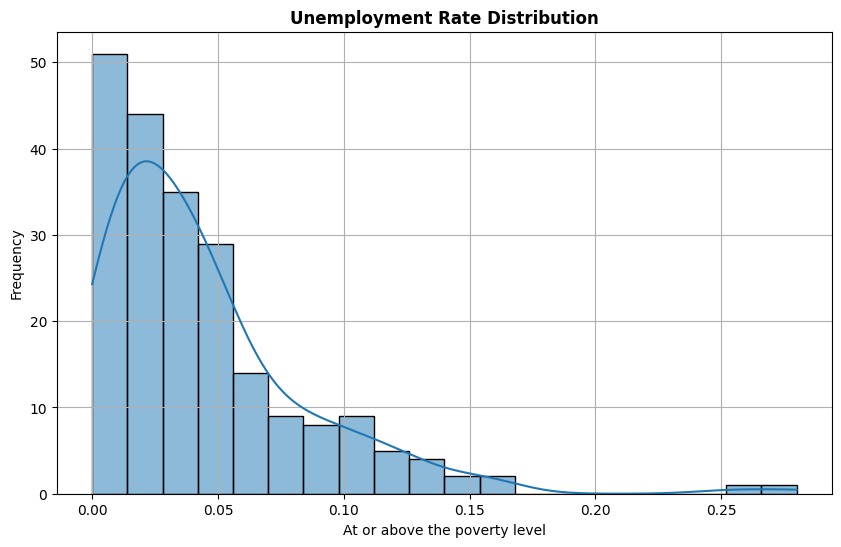

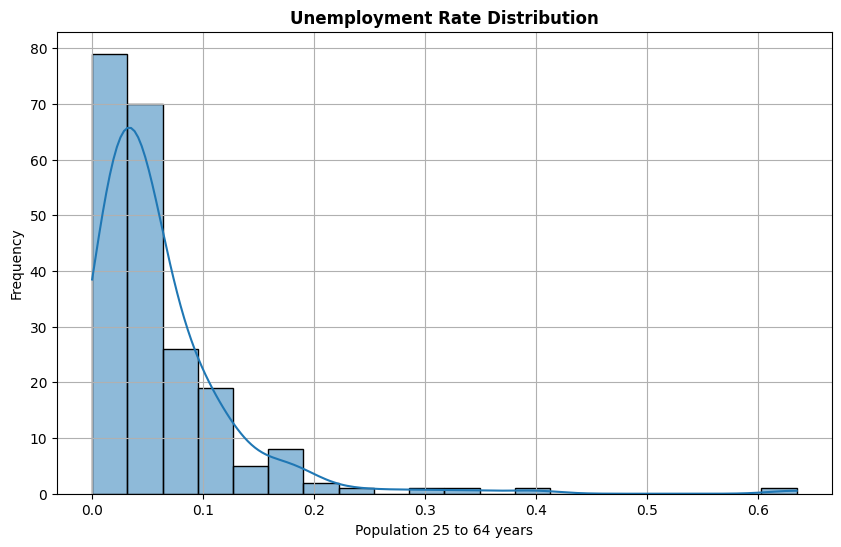

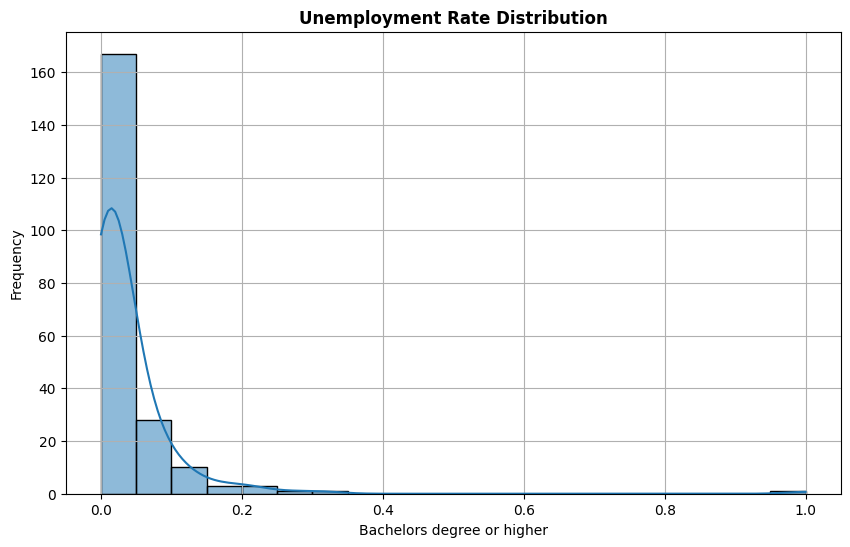

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the list of columns to analyze (excluding the 'Tract' column)
columns_to_plot = df_unemp_filt.columns[1:]  # Exclude the 'Tract' column

# Create individual histograms for each relevant column
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_unemp_filt[column], bins=20, kde=True) 
    plt.title('Unemployment Rate Distribution', fontweight='bold') 
    plt.xlabel(column.replace(' (Unemployment Rate)', ''))
    plt.ylabel('Frequency') 
    plt.grid(True) 
    plt.show() 

In [42]:
summary_statistics = df_unemp_filt.describe()
summary_statistics

,Tract,At or above the poverty level (Unemployment Rate),Population 25 to 64 years (Unemployment Rate),Bachelors degree or higher (Unemployment Rate)
count,214,214.0,214.0,214.0
unique,214,94.0,108.0,75.0
top,1.01,0.0,0.0,0.0
freq,1,18.0,8.0,64.0


In [43]:
df_unemp_filt.dtypes

# Convert the relevant columns to numeric, so the describe() method works as intended
df_unemp_filt['At or above the poverty level (Unemployment Rate)'] = pd.to_numeric(df_unemp_filt['At or above the poverty level (Unemployment Rate)'], errors='coerce')
df_unemp_filt['Population 25 to 64 years (Unemployment Rate)'] = pd.to_numeric(df_unemp_filt['Population 25 to 64 years (Unemployment Rate)'], errors='coerce')
df_unemp_filt['Bachelors degree or higher (Unemployment Rate)'] = pd.to_numeric(df_unemp_filt['Bachelors degree or higher (Unemployment Rate)'], errors='coerce')
    
df_unemp_filt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 4 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Tract                                              214 non-null    object 
 1   At or above the poverty level (Unemployment Rate)  214 non-null    float64
 2   Population 25 to 64 years (Unemployment Rate)      214 non-null    float64
 3   Bachelors degree or higher (Unemployment Rate)     214 non-null    float64
dtypes: float64(3), object(1)
memory usage: 6.8+ KB


In [44]:
# display summary statistics
summary_stats = df_unemp_filt.describe()
summary_stats

,At or above the poverty level (Unemployment Rate),Population 25 to 64 years (Unemployment Rate),Bachelors degree or higher (Unemployment Rate)
count,214.000000,214.000000,214.000000
mean,0.043813,0.061028,0.038369
std,0.042109,0.069620,0.082304
min,0.000000,0.000000,0.000000
25%,0.016000,0.023000,0.000000
50%,0.032500,0.043000,0.019000
75%,0.058750,0.078750,0.043000
max,0.280000,0.635000,1.000000


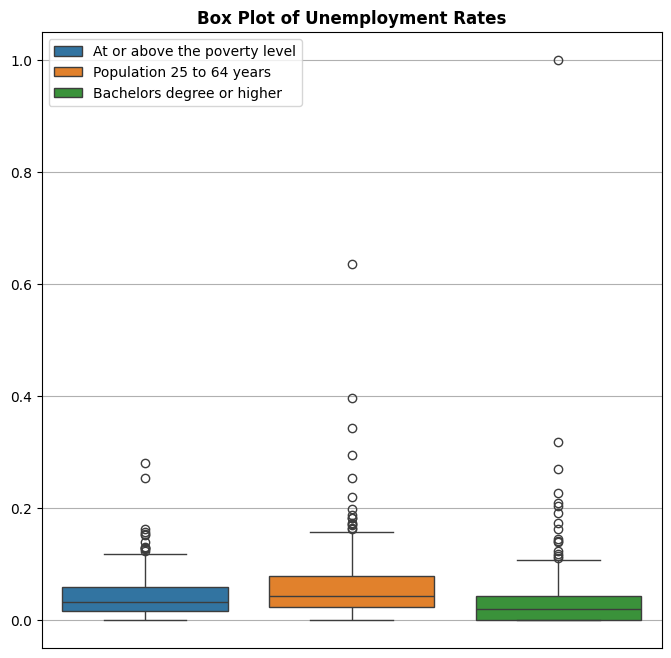

In [45]:
# Box Plots
plt.figure(figsize=(8, 8))
box_plot = sns.boxplot(data=df_unemp_filt[['At or above the poverty level (Unemployment Rate)', 
                                  'Population 25 to 64 years (Unemployment Rate)', 
                                  'Bachelors degree or higher (Unemployment Rate)']])
plt.title('Box Plot of Unemployment Rates', fontweight='bold')

# Remove x-axis labels
plt.xticks([])

# Create a legend using the labels
legend_labels = ['At or above the poverty level', 
                 'Population 25 to 64 years', 
                 'Bachelors degree or higher']

handles = [box_plot.patches[i] for i in range(len(legend_labels))]
plt.legend(handles, legend_labels)
plt.grid(True)
plt.show()

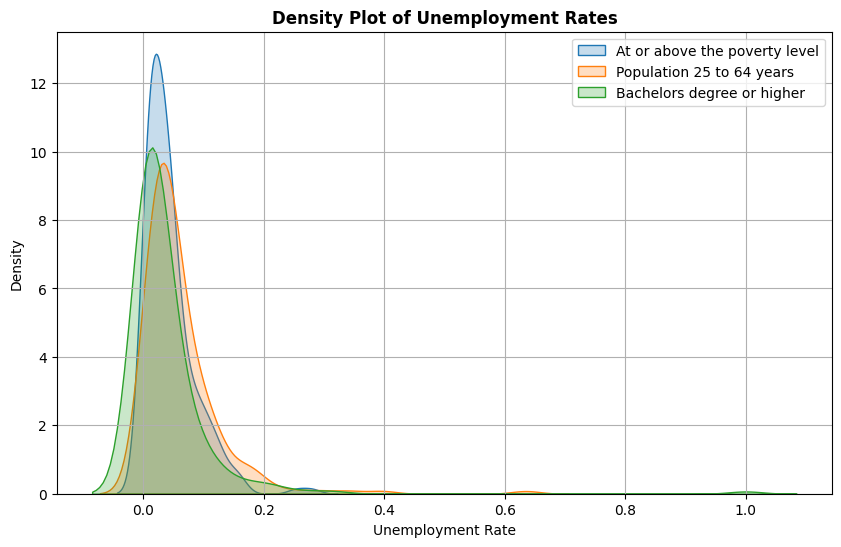

In [46]:
# Density Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df_unemp_filt['At or above the poverty level (Unemployment Rate)'], label='At or above the poverty level', fill=True)
sns.kdeplot(df_unemp_filt['Population 25 to 64 years (Unemployment Rate)'], label='Population 25 to 64 years', fill=True)
sns.kdeplot(df_unemp_filt['Bachelors degree or higher (Unemployment Rate)'], label='Bachelors degree or higher', fill=True)
plt.title('Density Plot of Unemployment Rates', fontweight='bold')
plt.xlabel('Unemployment Rate')
plt.legend()
plt.grid(True)
plt.show()

# Read in a second table from US Census - 'Financial Characteristics'

In [47]:
df_fin = pd.read_excel("Financial_Characteristis_ACSST5Y2022.S2503.xlsx", sheet_name="Data")
df_fin.to_csv("Financial_Characteristis_ACSST5Y2022.csv", index=False)
df_fin.head()

Unnamed: 0  \
0                                                NaN   
1                                              Label   
2                             Occupied housing units   
3  HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 202...   
4                                   Less than $5,000   

  Census Tract 1.01; Suffolk County; Massachusetts       Unnamed: 2  \
0                           Occupied housing units              NaN   
1                                         Estimate  Margin of Error   
2                                              570             ±105   
3                                              NaN              NaN   
4                                               19              ±20   

                       Unnamed: 3       Unnamed: 4  \
0  Percent occupied housing units              NaN   
1                        Estimate  Margin of Error   
2                             570             ±105   
3                             NaN              NaN   
4                            3.3%             ±3.7   

                     Unnamed: 5       Unnamed: 6  \
0  Owner-occupied housing units              NaN   
1                      Estimate  Margin of Error   
2                           151              ±97   
3                           NaN              NaN   
4                             0              ±14   

                             Unnamed: 7       Unnamed: 8  \
0  Percent owner-occupied housing units              NaN   
1                              Estimate  Margin of Error   
2                                   151              ±97   
3                                   NaN              NaN   
4                                  0.0%            ±24.2   

                      Unnamed: 9      Unnamed: 10  \
0  Renter-occupied housing units              NaN   
1                       Estimate  Margin of Error   
2                            419             ±101   
3                            NaN              NaN   
4                             19              ±20   

                             Unnamed: 11      Unnamed: 12  \
0  Percent renter-occupied housing units              NaN   
1                               Estimate  Margin of Error   
2                                    419             ±101   
3                                    NaN              NaN   
4                                   4.5%             ±5.0   

  Census Tract 1.02; Suffolk County; Massachusetts      Unnamed: 14  \
0                           Occupied housing units              NaN   
1                                         Estimate  Margin of Error   
2                                            1,551             ±250   
3                                              NaN              NaN   
4                                               90              ±68   

                      Unnamed: 15      Unnamed: 16  \
0  Percent occupied housing units              NaN   
1                        Estimate  Margin of Error   
2                           1,551             ±250   
3                             NaN              NaN   
4                            5.8%             ±4.5   

                    Unnamed: 17      Unnamed: 18  \
0  Owner-occupied housing units              NaN   
1                      Estimate  Margin of Error   
2                           292              ±96   
3                           NaN              NaN   
4                            12              ±20   

                            Unnamed: 19      Unnamed: 20  \
0  Percent owner-occupied housing units              NaN   
1                              Estimate  Margin of Error   
2                                   292              ±96   
3                                   NaN              NaN   
4                                  4.1%             ±7.1   

                     Unnamed: 21      Unnamed: 22  \
0  Renter-occupied housing units              NaN   
1                       Estimate  Margin of Error   
2       

In [48]:
# transpose the data to change features to columns and put tracts as rows
# delate the 'Unnamed: 0' column to prevent a transpose issue that was encountered
df_fin.rename(columns={'Unnamed: 0': ''}, inplace=True)
df_fin = df_fin.T
df_fin.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
,NaN,Label,Occupied housing units,HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 202...,"Less than $5,000","$5,000 to $9,999","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $34,999","$35,000 to $49,999","$50,000 to $74,999","$75,000 to $99,999","$100,000 to $149,999","$150,000 or more",Median household income (dollars),MONTHLY HOUSING COSTS,Less than $300,$300 to $499,$500 to $799,$800 to $999,"$1,000 to $1,499","$1,500 to $1,999","$2,000 to $2,499","$2,500 to $2,999","$3,000 or more",No cash rent,Median (dollars),MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSE...,"Less than $20,000",Less than 20 percent,20 to 29 percent,30 percent or more,"$20,000 to $34,999",Less than 20 percent,20 to 29 percent,30 percent or more,"$35,000 to $49,999",Less than 20 percent,20 to 29 percent,30 percent or more,"$50,000 to $74,999",Less than 20 percent,20 to 29 percent,30 percent or more,"$75,000 or more",Less than 20 percent,20 to 29 percent,30 percent or more,Zero or negative income,No cash rent
Census Tract 1.01; Suffolk County; Massachusetts,Occupied housing units,Estimate,570,NaN,19,0,10,0,0,18,59,22,3,230,209,"135,156",NaN,0,16,43,42,81,15,117,80,176,0,"2,376",NaN,25,0,0,25,18,0,0,18,59,0,8,51,22,0,10,12,442,266,97,79,4,0
Unnamed: 2,NaN,Margin of Error,±105,NaN,±20,±14,±16,±14,±14,±20,±57,±20,±5,±95,±86,"±19,779",NaN,±14,±24,±67,±35,±50,±15,±67,±43,±80,±14,±340,NaN,±24,±14,±14,±24,±20,±14,±14,±20,±57,±14,±11,±56,±20,±14,±16,±11,±113,±118,±67,±45,±8,±14
Unnamed: 3,Percent occupied housing units,Estimate,570,NaN,3.3%,0.0%,1.8%,0.0%,0.0%,3.2%,10.4%,3.9%,0.5%,40.4%,36.7%,"135,156",NaN,0.0%,2.8%,7.5%,7.4%,14.2%,2.6%,20.5%,14.0%,30.9%,0.0%,"2,376",NaN,4.4%,0.0%,0.0%,4.4%,3.2%,0.0%,0.0%,3.2%,10.4%,0.0%,1.4%,8.9%,3.9%,0.0%,1.8%,2.1%,77.5%,46.7%,17.0%,13.9%,0.7%,0.0%
Unnamed: 4,NaN,Margin of Error,±105,NaN,±3.7,±7.2,±2.8,±7.2,±7.2,±3.6,±9.9,±3.5,±0.9,±13.7,±13.0,"±19,779",NaN,±7.2,±4.2,±11.5,±6.0,±7.8,±2.6,±11.4,±7.8,±13.4,±7.2,±340,NaN,±4.4,±7.2,±7.2,±4.4,±3.6,±7.2,±7.2,±3.6,±9.9,±7.2,±2.1,±9.6,±3.5,±7.2,±2.9,±2.0,±10.8,±16.3,±11.9,±8.1,±1.3,±7.2


In [49]:
# set row 1 to column names and drop row 1
df_fin.columns = df_fin.iloc[0]
df_fin = df_fin.drop(df_fin.index[0])
df_fin.head()

,NaN,Label,Occupied housing units,HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2022 INFLATION-ADJUSTED DOLLARS),"Less than $5,000","$5,000 to $9,999","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $34,999","$35,000 to $49,999","$50,000 to $74,999","$75,000 to $99,999","$100,000 to $149,999","$150,000 or more",Median household income (dollars),MONTHLY HOUSING COSTS,Less than $300,$300 to $499,$500 to $799,$800 to $999,"$1,000 to $1,499","$1,500 to $1,999","$2,000 to $2,499","$2,500 to $2,999","$3,000 or more",No cash rent,Median (dollars),MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS,"Less than $20,000",Less than 20 percent,20 to 29 percent,30 percent or more,"$20,000 to $34,999",Less than 20 percent,20 to 29 percent,30 percent or more,"$35,000 to $49,999",Less than 20 percent,20 to 29 percent,30 percent or more,"$50,000 to $74,999",Less than 20 percent,20 to 29 percent,30 percent or more,"$75,000 or more",Less than 20 percent,20 to 29 percent,30 percent or more,Zero or negative income,No cash rent
Census Tract 1.01; Suffolk County; Massachusetts,Occupied housing units,Estimate,570,NaN,19,0,10,0,0,18,59,22,3,230,209,"135,156",NaN,0,16,43,42,81,15,117,80,176,0,"2,376",NaN,25,0,0,25,18,0,0,18,59,0,8,51,22,0,10,12,442,266,97,79,4,0
Unnamed: 2,NaN,Margin of Error,±105,NaN,±20,±14,±16,±14,±14,±20,±57,±20,±5,±95,±86,"±19,779",NaN,±14,±24,±67,±35,±50,±15,±67,±43,±80,±14,±340,NaN,±24,±14,±14,±24,±20,±14,±14,±20,±57,±14,±11,±56,±20,±14,±16,±11,±113,±118,±67,±45,±8,±14
Unnamed: 3,Percent occupied housing units,Estimate,570,NaN,3.3%,0.0%,1.8%,0.0%,0.0%,3.2%,10.4%,3.9%,0.5%,40.4%,36.7%,"135,156",NaN,0.0%,2.8%,7.5%,7.4%,14.2%,2.6%,20.5%,14.0%,30.9%,0.0%,"2,376",NaN,4.4%,0.0%,0.0%,4.4%,3.2%,0.0%,0.0%,3.2%,10.4%,0.0%,1.4%,8.9%,3.9%,0.0%,1.8%,2.1%,77.5%,46.7%,17.0%,13.9%,0.7%,0.0%
Unnamed: 4,NaN,Margin of Error,±105,NaN,±3.7,±7.2,±2.8,±7.2,±7.2,±3.6,±9.9,±3.5,±0.9,±13.7,±13.0,"±19,779",NaN,±7.2,±4.2,±11.5,±6.0,±7.8,±2.6,±11.4,±7.8,±13.4,±7.2,±340,NaN,±4.4,±7.2,±7.2,±4.4,±3.6,±7.2,±7.2,±3.6,±9.9,±7.2,±2.1,±9.6,±3.5,±7.2,±2.9,±2.0,±10.8,±16.3,±11.9,±8.1,±1.3,±7.2
Unnamed: 5,Owner-occupied housing units,Estimate,151,NaN,0,0,0,0,0,0,0,0,0,105,46,"126,528",NaN,0,16,43,9,14,7,1,0,61,(X),-,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,151,119,5,27,0,(X)


In [50]:
# make indices the first column to preserve tract data and re-set
df_fin['Tract'] = df_fin.index
df_fin.insert(0, 'Tract', df_fin.pop('Tract')) # place tract in first column
df_fin.reset_index(drop=True, inplace=True) # reset indices 
df_fin.rename_axis("Index", inplace=True)
df_fin.head()

,Tract,NaN,Label,Occupied housing units,HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2022 INFLATION-ADJUSTED DOLLARS),"Less than $5,000","$5,000 to $9,999","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $34,999","$35,000 to $49,999","$50,000 to $74,999","$75,000 to $99,999","$100,000 to $149,999","$150,000 or more",Median household income (dollars),MONTHLY HOUSING COSTS,Less than $300,$300 to $499,$500 to $799,$800 to $999,"$1,000 to $1,499","$1,500 to $1,999","$2,000 to $2,499","$2,500 to $2,999","$3,000 or more",No cash rent,Median (dollars),MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS,"Less than $20,000",Less than 20 percent,20 to 29 percent,30 percent or more,"$20,000 to $34,999",Less than 20 percent,20 to 29 percent,30 percent or more,"$35,000 to $49,999",Less than 20 percent,20 to 29 percent,30 percent or more,"$50,000 to $74,999",Less than 20 percent,20 to 29 percent,30 percent or more,"$75,000 or more",Less than 20 percent,20 to 29 percent,30 percent or more,Zero or negative income,No cash rent
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Census Tract 1.01; Suffolk County; Massachusetts,Occupied housing units,Estimate,570,NaN,19,0,10,0,0,18,59,22,3,230,209,"135,156",NaN,0,16,43,42,81,15,117,80,176,0,"2,376",NaN,25,0,0,25,18,0,0,18,59,0,8,51,22,0,10,12,442,266,97,79,4,0
1,Unnamed: 2,NaN,Margin of Error,±105,NaN,±20,±14,±16,±14,±14,±20,±57,±20,±5,±95,±86,"±19,779",NaN,±14,±24,±67,±35,±50,±15,±67,±43,±80,±14,±340,NaN,±24,±14,±14,±24,±20,±14,±14,±20,±57,±14,±11,±56,±20,±14,±16,±11,±113,±118,±67,±45,±8,±14
2,Unnamed: 3,Percent occupied housing units,Estimate,570,NaN,3.3%,0.0%,1.8%,0.0%,0.0%,3.2%,10.4%,3.9%,0.5%,40.4%,36.7%,"135,156",NaN,0.0%,2.8%,7.5%,7.4%,14.2%,2.6%,20.5%,14.0%,30.9%,0.0%,"2,376",NaN,4.4%,0.0%,0.0%,4.4%,3.2%,0.0%,0.0%,3.2%,10.4%,0.0%,1.4%,8.9%,3.9%,0.0%,1.8%,2.1%,77.5%,46.7%,17.0%,13.9%,0.7%,0.0%
3,Unnamed: 4,NaN,Margin of Error,±105,NaN,±3.7,±7.2,±2.8,±7.2,±7.2,±3.6,±9.9,±3.5,±0.9,±13.7,±13.0,"±19,779",NaN,±7.2,±4.2,±11.5,±6.0,±7.8,±2.6,±11.4,±7.8,±13.4,±7.2,±340,NaN,±4.4,±7.2,±7.2,±4.4,±3.6,±7.2,±7.2,±3.6,±9.9,±7.2,±2.1,±9.6,±3.5,±7.2,±2.9,±2.0,±10.8,±16.3,±11.9,±8.1,±1.3,±7.2
4,Unnamed: 5,Owner-occupied housing units,Estimate,151,NaN,0,0,0,0,0,0,0,0,0,105,46,"126,528",NaN,0,16,43,9,14,7,1,0,61,(X),-,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,151,119,5,27,0,(X)


In [51]:
df_fin.rename(columns={np.nan: 'Metric'}, inplace=True)
df_fin[0:15]

,Tract,Metric,Label,Occupied housing units,HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2022 INFLATION-ADJUSTED DOLLARS),"Less than $5,000","$5,000 to $9,999","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $34,999","$35,000 to $49,999","$50,000 to $74,999","$75,000 to $99,999","$100,000 to $149,999","$150,000 or more",Median household income (dollars),MONTHLY HOUSING COSTS,Less than $300,$300 to $499,$500 to $799,$800 to $999,"$1,000 to $1,499","$1,500 to $1,999","$2,000 to $2,499","$2,500 to $2,999","$3,000 or more",No cash rent,Median (dollars),MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS,"Less than $20,000",Less than 20 percent,20 to 29 percent,30 percent or more,"$20,000 to $34,999",Less than 20 percent,20 to 29 percent,30 percent or more,"$35,000 to $49,999",Less than 20 percent,20 to 29 percent,30 percent or more,"$50,000 to $74,999",Less than 20 percent,20 to 29 percent,30 percent or more,"$75,000 or more",Less than 20 percent,20 to 29 percent,30 percent or more,Zero or negative income,No cash rent
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Census Tract 1.01; Suffolk County; Massachusetts,Occupied housing units,Estimate,570,NaN,19,0,10,0,0,18,59,22,3,230,209,"135,156",NaN,0,16,43,42,81,15,117,80,176,0,"2,376",NaN,25,0,0,25,18,0,0,18,59,0,8,51,22,0,10,12,442,266,97,79,4,0
1,Unnamed: 2,NaN,Margin of Error,±105,NaN,±20,±14,±16,±14,±14,±20,±57,±20,±5,±95,±86,"±19,779",NaN,±14,±24,±67,±35,±50,±15,±67,±43,±80,±14,±340,NaN,±24,±14,±14,±24,±20,±14,±14,±20,±57,±14,±11,±56,±20,±14,±16,±11,±113,±118,±67,±45,±8,±14
2,Unnamed: 3,Percent occupied housing units,Estimate,570,NaN,3.3%,0.0%,1.8%,0.0%,0.0%,3.2%,10.4%,3.9%,0.5%,40.4%,36.7%,"135,156",NaN,0.0%,2.8%,7.5%,7.4%,14.2%,2.6%,20.5%,14.0%,30.9%,0.0%,"2,376",NaN,4.4%,0.0%,0.0%,4.4%,3.2%,0.0%,0.0%,3.2%,10.4%,0.0%,1.4%,8.9%,3.9%,0.0%,1.8%,2.1%,77.5%,46.7%,17.0%,13.9%,0.7%,0.0%
3,Unnamed: 4,NaN,Margin of Error,±105,NaN,±3.7,±7.2,±2.8,±7.2,±7.2,±3.6,±9.9,±3.5,±0.9,±13.7,±13.0,"±19,779",NaN,±7.2,±4.2,±11.5,±6.0,±7.8,±2.6,±11.4,±7.8,±13.4,±7.2,±340,NaN,±4.4,±7.2,±7.2,±4.4,±3.6,±7.2,±7.2,±3.6,±9.9,±7.2,±2.1,±9.6,±3.5,±7.2,±2.9,±2.0,±10.8,±16.3,±11.9,±8.1,±1.3,±7.2
4,Unnamed: 5,Owner-occupied housing units,Estimate,151,NaN,0,0,0,0,0,0,0,0,0,105,46,"126,528",NaN,0,16,43,9,14,7,1,0,61,(X),-,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,151,119,5,27,0,(X)
5,Unnamed: 6,NaN,Margin of Error,±97,NaN,±14,±14,±14,±14,±14,±14,±14,±14,±14,±78,±43,"±25,689",NaN,±14,±24,±67,±14,±17,±11,±6,±14,±52,(X),**,NaN,±14,±14,±14,±14,±14,±14,±14,±14,±14,±14,±14,±14,±14,±14,±14,±14,±97,±95,±8,±38,±14,(X)
6,Unnamed: 7,Percent owner-occupied housing units,Estimate,151,NaN,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,69.5%,30.5%,"126,528",NaN,0.0%,10.6%,28.5%,6.0%,9.3%,4.6%,0.7%,0.0%,40.4%,(X),-,NaN,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,100.0%,78.8%,3.3%,17.9%,0.0%,(X)
7,Unnamed: 8,NaN,Margin of Error,±97,NaN,±24.2,±24.2,±24.2,±24.2,±24.2,±24.2,±24.2,±24.2,±24.2,±23.1,±23.1,"±25,689",NaN,±24.2,±17.1,±33.6,±10.7,±12.6,±8.6,±4.5,±24.2,±26.6,(X),**,NaN,±24.2,±24.2,±24.2,±24.2,±24.2,±24.2,±24.2,±24.2,±24.2,±24.2,±24.2,±24.2,±24.2,±24.2,±24.2,±24.2,±24.2,±27.3,±6.0,±26.5,±24.2,(X)
8,Unnamed: 9,Renter-occupied housing units,Estimate,419,NaN,19,0,10,0,0,18,59,22,3,125,163,"141,964",NaN,0,0,0,33,67,8,116,80,115,0,"2,438",NaN,25,0,0,25,18,0,0,18,59,0,8,51,22,0,10,12,291,147,92,52,4,0


In [52]:
# drop all rows except Occupied housing units and Percent occupied housing units
df_fin = df_fin[df_fin['Metric'].isin(['Occupied housing units', 'Percent occupied housing units'])]

In [53]:
df_fin

,Tract,Metric,Label,Occupied housing units,HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2022 INFLATION-ADJUSTED DOLLARS),"Less than $5,000","$5,000 to $9,999","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $34,999","$35,000 to $49,999","$50,000 to $74,999","$75,000 to $99,999","$100,000 to $149,999","$150,000 or more",Median household income (dollars),MONTHLY HOUSING COSTS,Less than $300,$300 to $499,$500 to $799,$800 to $999,"$1,000 to $1,499","$1,500 to $1,999","$2,000 to $2,499","$2,500 to $2,999","$3,000 or more",No cash rent,Median (dollars),MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS,"Less than $20,000",Less than 20 percent,20 to 29 percent,30 percent or more,"$20,000 to $34,999",Less than 20 percent,20 to 29 percent,30 percent or more,"$35,000 to $49,999",Less than 20 percent,20 to 29 percent,30 percent or more,"$50,000 to $74,999",Less than 20 percent,20 to 29 percent,30 percent or more,"$75,000 or more",Less than 20 percent,20 to 29 percent,30 percent or more,Zero or negative income,No cash rent
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Census Tract 1.01; Suffolk County; Massachusetts,Occupied housing units,Estimate,570,NaN,19,0,10,0,0,18,59,22,3,230,209,"135,156",NaN,0,16,43,42,81,15,117,80,176,0,"2,376",NaN,25,0,0,25,18,0,0,18,59,0,8,51,22,0,10,12,442,266,97,79,4,0
2,Unnamed: 3,Percent occupied housing units,Estimate,570,NaN,3.3%,0.0%,1.8%,0.0%,0.0%,3.2%,10.4%,3.9%,0.5%,40.4%,36.7%,"135,156",NaN,0.0%,2.8%,7.5%,7.4%,14.2%,2.6%,20.5%,14.0%,30.9%,0.0%,"2,376",NaN,4.4%,0.0%,0.0%,4.4%,3.2%,0.0%,0.0%,3.2%,10.4%,0.0%,1.4%,8.9%,3.9%,0.0%,1.8%,2.1%,77.5%,46.7%,17.0%,13.9%,0.7%,0.0%
12,Census Tract 1.02; Suffolk County; Massachusetts,Occupied housing units,Estimate,"1,551",NaN,90,11,33,37,116,129,148,165,177,175,470,"84,044",NaN,58,113,133,133,285,54,184,233,345,13,"1,968",NaN,156,0,0,156,245,29,59,157,148,12,39,97,165,63,30,72,809,218,457,134,15,13
14,Unnamed: 15,Percent occupied housing units,Estimate,"1,551",NaN,5.8%,0.7%,2.1%,2.4%,7.5%,8.3%,9.5%,10.6%,11.4%,11.3%,30.3%,"84,044",NaN,3.7%,7.3%,8.6%,8.6%,18.4%,3.5%,11.9%,15.0%,22.2%,0.8%,"1,968",NaN,10.1%,0.0%,0.0%,10.1%,15.8%,1.9%,3.8%,10.1%,9.5%,0.8%,2.5%,6.3%,10.6%,4.1%,1.9%,4.6%,52.2%,14.1%,29.5%,8.6%,1.0%,0.8%
24,Census Tract 2.01; Suffolk County; Massachusetts,Occupied housing units,Estimate,"1,891",NaN,26,28,21,79,23,109,160,199,238,505,503,"111,477",NaN,11,21,35,70,124,207,341,567,492,23,"2,610",NaN,143,0,0,143,132,0,0,132,160,0,17,143,199,15,11,173,"1,234",376,627,231,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2786,Unnamed: 2787,Percent occupied housing units,Estimate,28,NaN,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,46.4%,0.0%,17.9%,35.7%,-,NaN,0.0%,0.0%,0.0%,0.0%,0.0%,64.3%,0.0%,0.0%,35.7%,0.0%,"1,800",NaN,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,46.4%,0.0%,0.0%,46.4%,53.6%,35.7%,17.9%,0.0%,0.0%,0.0%
2796,Census Tract 9819; Suffolk County; Massachusetts,Occupied housing units,Estimate,0,NaN,0,0,0,0,0,0,0,0,0,0,0,-,NaN,0,0,0,0,0,0,0,0,0,0,-,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2798,Unnamed: 2799,Percent occupied housing units,Estimate,0,NaN,-,-,-,-,-,-,-,-,-,-,-,-,NaN,-,-,-,-,-,-,-,-,-,-,-,NaN,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-


In [54]:
# replace 'Unnamed' values in Tract column with NaN
unnamed_tract = df_fin['Tract'].str.contains('^Unnamed')
df_fin['Tract'] = np.where(unnamed_tract, np.nan, df_fin['Tract'])

# fill in null values with the correct tract 
df_fin['Tract'].fillna(method='ffill', inplace=True)
df_fin.head(15)

/tmp/ipykernel_17613/2011009342.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fin['Tract'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_17613/2011009342.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_fin['Tract'].fillna(method='ffill', inplace=True)


,Tract,Metric,Label,Occupied housing units,HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2022 INFLATION-ADJUSTED DOLLARS),"Less than $5,000","$5,000 to $9,999","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $34,999","$35,000 to $49,999","$50,000 to $74,999","$75,000 to $99,999","$100,000 to $149,999","$150,000 or more",Median household income (dollars),MONTHLY HOUSING COSTS,Less than $300,$300 to $499,$500 to $799,$800 to $999,"$1,000 to $1,499","$1,500 to $1,999","$2,000 to $2,499","$2,500 to $2,999","$3,000 or more",No cash rent,Median (dollars),MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS,"Less than $20,000",Less than 20 percent,20 to 29 percent,30 percent or more,"$20,000 to $34,999",Less than 20 percent,20 to 29 percent,30 percent or more,"$35,000 to $49,999",Less than 20 percent,20 to 29 percent,30 percent or more,"$50,000 to $74,999",Less than 20 percent,20 to 29 percent,30 percent or more,"$75,000 or more",Less than 20 percent,20 to 29 percent,30 percent or more,Zero or negative income,No cash rent
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Census Tract 1.01; Suffolk County; Massachusetts,Occupied housing units,Estimate,570,NaN,19,0,10,0,0,18,59,22,3,230,209,"135,156",NaN,0,16,43,42,81,15,117,80,176,0,"2,376",NaN,25,0,0,25,18,0,0,18,59,0,8,51,22,0,10,12,442,266,97,79,4,0
2,Census Tract 1.01; Suffolk County; Massachusetts,Percent occupied housing units,Estimate,570,NaN,3.3%,0.0%,1.8%,0.0%,0.0%,3.2%,10.4%,3.9%,0.5%,40.4%,36.7%,"135,156",NaN,0.0%,2.8%,7.5%,7.4%,14.2%,2.6%,20.5%,14.0%,30.9%,0.0%,"2,376",NaN,4.4%,0.0%,0.0%,4.4%,3.2%,0.0%,0.0%,3.2%,10.4%,0.0%,1.4%,8.9%,3.9%,0.0%,1.8%,2.1%,77.5%,46.7%,17.0%,13.9%,0.7%,0.0%
12,Census Tract 1.02; Suffolk County; Massachusetts,Occupied housing units,Estimate,"1,551",NaN,90,11,33,37,116,129,148,165,177,175,470,"84,044",NaN,58,113,133,133,285,54,184,233,345,13,"1,968",NaN,156,0,0,156,245,29,59,157,148,12,39,97,165,63,30,72,809,218,457,134,15,13
14,Census Tract 1.02; Suffolk County; Massachusetts,Percent occupied housing units,Estimate,"1,551",NaN,5.8%,0.7%,2.1%,2.4%,7.5%,8.3%,9.5%,10.6%,11.4%,11.3%,30.3%,"84,044",NaN,3.7%,7.3%,8.6%,8.6%,18.4%,3.5%,11.9%,15.0%,22.2%,0.8%,"1,968",NaN,10.1%,0.0%,0.0%,10.1%,15.8%,1.9%,3.8%,10.1%,9.5%,0.8%,2.5%,6.3%,10.6%,4.1%,1.9%,4.6%,52.2%,14.1%,29.5%,8.6%,1.0%,0.8%
24,Census Tract 2.01; Suffolk County; Massachusetts,Occupied housing units,Estimate,"1,891",NaN,26,28,21,79,23,109,160,199,238,505,503,"111,477",NaN,11,21,35,70,124,207,341,567,492,23,"2,610",NaN,143,0,0,143,132,0,0,132,160,0,17,143,199,15,11,173,"1,234",376,627,231,0,23
26,Census Tract 2.01; Suffolk County; Massachusetts,Percent occupied housing units,Estimate,"1,891",NaN,1.4%,1.5%,1.1%,4.2%,1.2%,5.8%,8.5%,10.5%,12.6%,26.7%,26.6%,"111,477",NaN,0.6%,1.1%,1.9%,3.7%,6.6%,10.9%,18.0%,30.0%,26.0%,1.2%,"2,610",NaN,7.6%,0.0%,0.0%,7.6%,7.0%,0.0%,0.0%,7.0%,8.5%,0.0%,0.9%,7.6%,10.5%,0.8%,0.6%,9.1%,65.3%,19.9%,33.2%,12.2%,0.0%,1.2%
36,Census Tract 2.02; Suffolk County; Massachusetts,Occupied housing units,Estimate,"1,525",NaN,3,53,45,73,53,138,153,163,132,211,501,"84,792",NaN,45,104,141,73,215,121,328,208,287,3,"2,095",NaN,171,18,9,144,191,5,16,170,153,109,0,44,163,30,41,92,844,426,285,133,0,3
38,Census Tract 2.02; Suffolk County; Massachusetts,Percent occupied housing units,Estimate,"1,525",NaN,0.2%,3.5%,3.0%,4.8%,3.5%,9.0%,10.0%,10.7%,8.7%,13.8%,32.9%,"84,792",NaN,3.0%,6.8%,9.2%,4.8%,14.1%,7.9%,21.5%,13.6%,18.8%,0.2%,"2,095",NaN,11.2%,1.2%,0.6%,9.4%,12.5%,0.3%,1.0%,11.1%,10.0%,7.1%,0.0%,2.9%,10.7%,2.0%,2.7%,6.0%,55.3%,27.9%,18.7%,8.7%,0.0%,0.2%
48,Census Tract 3.01; Suffolk County; Massachusetts,Occupied housing units,Estimate,"1,189",NaN,40,0,26,0,6,22,57,61,120,537,320,"133,051",NaN,0,17,67,60,50,92,306,223,351,23,"2,485",NaN,26,0,0,26,28,0,0,28,57,0,29,28,61,0,19,42,954,301,457,196,40,23


In [55]:
# remove words from Tract values to only keep the Tract number (for later merging)
remove_words = r'Census Tract |; Suffolk County; Massachusetts'
df_fin.loc[:,'Tract'] = df_fin['Tract'].str.replace(remove_words, '', regex=True)

In [56]:
df_fin = df_fin.rename(columns={'Median household income (dollars)': 'Median household income', 
                       'Median (dollars)': 'Median monthly housing cost',
                       '$150,000 or more': 'Median household income $150,000 or more',
                       '$100,000 to $149,999': 'Median household income $100,000 to $149,999',
                       '$35,000 to $49,999': 'Median household income $35,000 to $49,999',
                       '$50,000 to $74,999': 'Median household income $50,000 to $74,999'})

df_fin.head()

,Tract,Metric,Label,Occupied housing units,HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2022 INFLATION-ADJUSTED DOLLARS),"Less than $5,000","$5,000 to $9,999","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $34,999","Median household income $35,000 to $49,999","Median household income $50,000 to $74,999","$75,000 to $99,999","Median household income $100,000 to $149,999","Median household income $150,000 or more",Median household income,MONTHLY HOUSING COSTS,Less than $300,$300 to $499,$500 to $799,$800 to $999,"$1,000 to $1,499","$1,500 to $1,999","$2,000 to $2,499","$2,500 to $2,999","$3,000 or more",No cash rent,Median monthly housing cost,MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS,"Less than $20,000",Less than 20 percent,20 to 29 percent,30 percent or more,"$20,000 to $34,999",Less than 20 percent,20 to 29 percent,30 percent or more,"Median household income $35,000 to $49,999",Less than 20 percent,20 to 29 percent,30 percent or more,"Median household income $50,000 to $74,999",Less than 20 percent,20 to 29 percent,30 percent or more,"$75,000 or more",Less than 20 percent,20 to 29 percent,30 percent or more,Zero or negative income,No cash rent
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.01,Occupied housing units,Estimate,570,NaN,19,0,10,0,0,18,59,22,3,230,209,"135,156",NaN,0,16,43,42,81,15,117,80,176,0,"2,376",NaN,25,0,0,25,18,0,0,18,59,0,8,51,22,0,10,12,442,266,97,79,4,0
2,1.01,Percent occupied housing units,Estimate,570,NaN,3.3%,0.0%,1.8%,0.0%,0.0%,3.2%,10.4%,3.9%,0.5%,40.4%,36.7%,"135,156",NaN,0.0%,2.8%,7.5%,7.4%,14.2%,2.6%,20.5%,14.0%,30.9%,0.0%,"2,376",NaN,4.4%,0.0%,0.0%,4.4%,3.2%,0.0%,0.0%,3.2%,10.4%,0.0%,1.4%,8.9%,3.9%,0.0%,1.8%,2.1%,77.5%,46.7%,17.0%,13.9%,0.7%,0.0%
12,1.02,Occupied housing units,Estimate,"1,551",NaN,90,11,33,37,116,129,148,165,177,175,470,"84,044",NaN,58,113,133,133,285,54,184,233,345,13,"1,968",NaN,156,0,0,156,245,29,59,157,148,12,39,97,165,63,30,72,809,218,457,134,15,13
14,1.02,Percent occupied housing units,Estimate,"1,551",NaN,5.8%,0.7%,2.1%,2.4%,7.5%,8.3%,9.5%,10.6%,11.4%,11.3%,30.3%,"84,044",NaN,3.7%,7.3%,8.6%,8.6%,18.4%,3.5%,11.9%,15.0%,22.2%,0.8%,"1,968",NaN,10.1%,0.0%,0.0%,10.1%,15.8%,1.9%,3.8%,10.1%,9.5%,0.8%,2.5%,6.3%,10.6%,4.1%,1.9%,4.6%,52.2%,14.1%,29.5%,8.6%,1.0%,0.8%
24,2.01,Occupied housing units,Estimate,"1,891",NaN,26,28,21,79,23,109,160,199,238,505,503,"111,477",NaN,11,21,35,70,124,207,341,567,492,23,"2,610",NaN,143,0,0,143,132,0,0,132,160,0,17,143,199,15,11,173,"1,234",376,627,231,0,23


In [57]:
df_fin.columns

Index(['Tract', 'Metric', 'Label', 'Occupied housing units',
       'HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2022 INFLATION-ADJUSTED DOLLARS)',
       'Less than $5,000', '$5,000 to $9,999', '$10,000 to $14,999',
       '$15,000 to $19,999', '$20,000 to $24,999', '$25,000 to $34,999',
       'Median household income $35,000 to $49,999',
       'Median household income $50,000 to $74,999', '$75,000 to $99,999',
       'Median household income $100,000 to $149,999',
       'Median household income $150,000 or more', 'Median household income',
       'MONTHLY HOUSING COSTS', 'Less than $300', '$300 to $499',
       '$500 to $799', '$800 to $999', '$1,000 to $1,499', '$1,500 to $1,999',
       '$2,000 to $2,499', '$2,500 to $2,999', '$3,000 or more',
       'No cash rent', 'Median monthly housing cost',
       'MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS',
       'Less than $20,000', 'Less than 20 percent', '20 to 29 percent',
       '30 percent or mo

In [58]:
# drop columns 
columns_to_drop = ['Label','Less than $300', '$300 to $499', '$500 to $799', '$800 to $999',
       '$1,000 to $1,499', '$1,500 to $1,999', '$2,000 to $2,499',
       '$2,500 to $2,999', '$3,000 or more', 'No cash rent',
       'MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS',
       'Less than $20,000', 'Less than 20 percent', '20 to 29 percent',
       '30 percent or more', '$20,000 to $34,999', 'Less than 20 percent',
       '20 to 29 percent', '30 percent or more', '$35,000 to $49,999',
       'Less than 20 percent', '20 to 29 percent', '30 percent or more',
       '$50,000 to $74,999', 'Less than 20 percent', '20 to 29 percent',
       '30 percent or more', '$75,000 or more', 'Less than 20 percent',
       '20 to 29 percent', '30 percent or more', 'Zero or negative income',
       'No cash rent']

# Filter columns to drop based on existing columns
existing_columns_to_drop = [col for col in columns_to_drop if col in df_fin.columns]

# Drop the existing columns
df_fin = df_fin.drop(columns=existing_columns_to_drop)

df_fin.columns

Index(['Tract', 'Metric', 'Occupied housing units',
       'HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2022 INFLATION-ADJUSTED DOLLARS)',
       'Less than $5,000', '$5,000 to $9,999', '$10,000 to $14,999',
       '$15,000 to $19,999', '$20,000 to $24,999', '$25,000 to $34,999',
       'Median household income $35,000 to $49,999',
       'Median household income $50,000 to $74,999', '$75,000 to $99,999',
       'Median household income $100,000 to $149,999',
       'Median household income $150,000 or more', 'Median household income',
       'MONTHLY HOUSING COSTS', 'Median monthly housing cost',
       'Median household income $35,000 to $49,999',
       'Median household income $50,000 to $74,999'],
      dtype='object', name='')

In [59]:
df_fin = df_fin.dropna(how='all', axis=1)

In [60]:
def conv_to_numeric(val):
    # Handle percentage conversion
    if isinstance(val, str) and "%" in val:
        val = float(val.replace('%', '')) / 100
    # Handle integers with commas
    elif isinstance(val, str):
        try:
            val = int(val.replace(',', ''))
        except ValueError:
            return val  # Don't convert if string is not valid int
    # Attempt to convert to float
    try:
        return float(val)
    except (ValueError, TypeError):
        return val  # Return the original value if conversion fails

# Apply the conversion only to columns 3 onward
df_fin.iloc[:, 2:] = df_fin.iloc[:, 2:].applymap(conv_to_numeric)

/tmp/ipykernel_17613/2679271095.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_fin.iloc[:, 2:] = df_fin.iloc[:, 2:].applymap(conv_to_numeric)


In [61]:
# Iterate through each column and print the type of each entry
for column in df_fin.columns:
    print(f"Column: {column}")
    types = df_fin[column].apply(type)
    print(types)
    print() 

Column: Tract
Index
0       <class 'str'>
2       <class 'str'>
12      <class 'str'>
14      <class 'str'>
24      <class 'str'>
            ...      
2786    <class 'str'>
2796    <class 'str'>
2798    <class 'str'>
2808    <class 'str'>
2810    <class 'str'>
Name: Tract, Length: 470, dtype: object

Column: Metric
Index
0       <class 'str'>
2       <class 'str'>
12      <class 'str'>
14      <class 'str'>
24      <class 'str'>
            ...      
2786    <class 'str'>
2796    <class 'str'>
2798    <class 'str'>
2808    <class 'str'>
2810    <class 'str'>
Name: Metric, Length: 470, dtype: object

Column: Occupied housing units
Index
0       <class 'float'>
2       <class 'float'>
12      <class 'float'>
14      <class 'float'>
24      <class 'float'>
             ...       
2786    <class 'float'>
2796    <class 'float'>
2798    <class 'float'>
2808    <class 'float'>
2810    <class 'float'>
Name: Occupied housing units, Length: 470, dtype: object

Column: Less than $5,000
Index
0 

In [62]:
def clean_to_float(val):
    try:
        # Attempt to convert the value directly to float
        return float(val)
    except (ValueError, TypeError):
        return np.nan  # Return NaN for non-convertible values

# Apply the conversion only to columns 3 onward (using iloc)
df_fin.iloc[:, 2:] = df_fin.iloc[:, 2:].applymap(clean_to_float)

/tmp/ipykernel_17613/1579307698.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_fin.iloc[:, 2:] = df_fin.iloc[:, 2:].applymap(clean_to_float)


In [63]:
df_fin = df_fin.replace('-', np.nan)

# drop all rows that contain only zeros or nan values (from the third column onward)
df_fin = df_fin[~df_fin.iloc[:, 2:].apply(lambda x: x.isin([0, np.nan]).all(), axis=1)]
df_fin.reset_index(drop=True)


,Tract,Metric,Occupied housing units,"Less than $5,000","$5,000 to $9,999","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $34,999","Median household income $35,000 to $49,999","Median household income $50,000 to $74,999","$75,000 to $99,999","Median household income $100,000 to $149,999","Median household income $150,000 or more",Median household income,Median monthly housing cost,"Median household income $35,000 to $49,999","Median household income $50,000 to $74,999"
0,1.01,Occupied housing units,570.0,19.0,0.0,10.0,0.0,0.0,18.0,59.0,22.0,3.0,230.0,209.0,135156.0,2376.0,59.0,22.0
1,1.01,Percent occupied housing units,570.0,0.033,0.0,0.018,0.0,0.0,0.032,0.104,0.039,0.005,0.404,0.367,135156.0,2376.0,0.104,0.039
2,1.02,Occupied housing units,1551.0,90.0,11.0,33.0,37.0,116.0,129.0,148.0,165.0,177.0,175.0,470.0,84044.0,1968.0,148.0,165.0
3,1.02,Percent occupied housing units,1551.0,0.058,0.007,0.021,0.024,0.075,0.083,0.095,0.106,0.114,0.113,0.303,84044.0,1968.0,0.095,0.106
4,2.01,Occupied housing units,1891.0,26.0,28.0,21.0,79.0,23.0,109.0,160.0,199.0,238.0,505.0,503.0,111477.0,2610.0,160.0,199.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,9811,Percent occupied housing units,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,0.0,1.0
440,9813,Occupied housing units,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,245000.0,3750.0,0.0,0.0
441,9813,Percent occupied housing units,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,245000.0,3750.0,0.0,0.0
442,9818,Occupied housing units,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,5.0,10.0,NaN,1800.0,0.0,13.0


In [64]:
df_fin = df_fin.iloc[:, :-2]  # Drop the last two columns (there are duplicate columns)
df_fin.head()

,Tract,Metric,Occupied housing units,"Less than $5,000","$5,000 to $9,999","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $34,999","Median household income $35,000 to $49,999","Median household income $50,000 to $74,999","$75,000 to $99,999","Median household income $100,000 to $149,999","Median household income $150,000 or more",Median household income,Median monthly housing cost
Index,,,,,,,,,,,,,,,,
0,1.01,Occupied housing units,570.0,19.0,0.0,10.0,0.0,0.0,18.0,59.0,22.0,3.0,230.0,209.0,135156.0,2376.0
2,1.01,Percent occupied housing units,570.0,0.033,0.0,0.018,0.0,0.0,0.032,0.104,0.039,0.005,0.404,0.367,135156.0,2376.0
12,1.02,Occupied housing units,1551.0,90.0,11.0,33.0,37.0,116.0,129.0,148.0,165.0,177.0,175.0,470.0,84044.0,1968.0
14,1.02,Percent occupied housing units,1551.0,0.058,0.007,0.021,0.024,0.075,0.083,0.095,0.106,0.114,0.113,0.303,84044.0,1968.0
24,2.01,Occupied housing units,1891.0,26.0,28.0,21.0,79.0,23.0,109.0,160.0,199.0,238.0,505.0,503.0,111477.0,2610.0


In [65]:
inc_groups_to_sum = df_fin[['Less than $5,000', '$5,000 to $9,999', '$10,000 to $14,999',
       '$15,000 to $19,999', '$20,000 to $24,999', '$25,000 to $34,999',
       'Median household income $35,000 to $49,999', 'Median household income $50,000 to $74,999', '$75,000 to $99,999']]

inc_groups_to_sum

,"Less than $5,000","$5,000 to $9,999","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $34,999","Median household income $35,000 to $49,999","Median household income $50,000 to $74,999","$75,000 to $99,999"
Index,,,,,,,,,
0,19.0,0.0,10.0,0.0,0.0,18.0,59.0,22.0,3.0
2,0.033,0.0,0.018,0.0,0.0,0.032,0.104,0.039,0.005
12,90.0,11.0,33.0,37.0,116.0,129.0,148.0,165.0,177.0
14,0.058,0.007,0.021,0.024,0.075,0.083,0.095,0.106,0.114
24,26.0,28.0,21.0,79.0,23.0,109.0,160.0,199.0,238.0
...,...,...,...,...,...,...,...,...,...
2690,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
# Sum the specified income groups row-wise and create a new column
df_fin['$75,000 to $99,999'] = inc_groups_to_sum.sum(axis=1)
df_fin = df_fin.rename(columns={'$75,000 to $99,999': 'Median household income below $100,000'})

df_fin

,Tract,Metric,Occupied housing units,"Less than $5,000","$5,000 to $9,999","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $34,999","Median household income $35,000 to $49,999","Median household income $50,000 to $74,999","Median household income below $100,000","Median household income $100,000 to $149,999","Median household income $150,000 or more",Median household income,Median monthly housing cost
Index,,,,,,,,,,,,,,,,
0,1.01,Occupied housing units,570.0,19.0,0.0,10.0,0.0,0.0,18.0,59.0,22.0,131.0,230.0,209.0,135156.0,2376.0
2,1.01,Percent occupied housing units,570.0,0.033,0.0,0.018,0.0,0.0,0.032,0.104,0.039,0.231,0.404,0.367,135156.0,2376.0
12,1.02,Occupied housing units,1551.0,90.0,11.0,33.0,37.0,116.0,129.0,148.0,165.0,906.0,175.0,470.0,84044.0,1968.0
14,1.02,Percent occupied housing units,1551.0,0.058,0.007,0.021,0.024,0.075,0.083,0.095,0.106,0.583,0.113,0.303,84044.0,1968.0
24,2.01,Occupied housing units,1891.0,26.0,28.0,21.0,79.0,23.0,109.0,160.0,199.0,883.0,505.0,503.0,111477.0,2610.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2690,9811,Percent occupied housing units,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,NaN
2724,9813,Occupied housing units,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,245000.0,3750.0
2726,9813,Percent occupied housing units,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,245000.0,3750.0


In [67]:
df_fin.columns

df_fin = df_fin.drop(columns=['Less than $5,000',
       '$5,000 to $9,999', '$10,000 to $14,999', '$15,000 to $19,999',
       '$20,000 to $24,999', '$25,000 to $34,999',
       'Median household income $35,000 to $49,999',
       'Median household income $50,000 to $74,999'])

In [68]:
df_fin

,Tract,Metric,Occupied housing units,"Median household income below $100,000","Median household income $100,000 to $149,999","Median household income $150,000 or more",Median household income,Median monthly housing cost
Index,,,,,,,,
0,1.01,Occupied housing units,570.0,131.0,230.0,209.0,135156.0,2376.0
2,1.01,Percent occupied housing units,570.0,0.231,0.404,0.367,135156.0,2376.0
12,1.02,Occupied housing units,1551.0,906.0,175.0,470.0,84044.0,1968.0
14,1.02,Percent occupied housing units,1551.0,0.583,0.113,0.303,84044.0,1968.0
24,2.01,Occupied housing units,1891.0,883.0,505.0,503.0,111477.0,2610.0
...,...,...,...,...,...,...,...,...
2690,9811,Percent occupied housing units,4.0,1.0,0.0,0.0,NaN,NaN
2724,9813,Occupied housing units,18.0,0.0,0.0,18.0,245000.0,3750.0
2726,9813,Percent occupied housing units,18.0,0.0,0.0,1.0,245000.0,3750.0


In [69]:
df_fin

,Tract,Metric,Occupied housing units,"Median household income below $100,000","Median household income $100,000 to $149,999","Median household income $150,000 or more",Median household income,Median monthly housing cost
Index,,,,,,,,
0,1.01,Occupied housing units,570.0,131.0,230.0,209.0,135156.0,2376.0
2,1.01,Percent occupied housing units,570.0,0.231,0.404,0.367,135156.0,2376.0
12,1.02,Occupied housing units,1551.0,906.0,175.0,470.0,84044.0,1968.0
14,1.02,Percent occupied housing units,1551.0,0.583,0.113,0.303,84044.0,1968.0
24,2.01,Occupied housing units,1891.0,883.0,505.0,503.0,111477.0,2610.0
...,...,...,...,...,...,...,...,...
2690,9811,Percent occupied housing units,4.0,1.0,0.0,0.0,NaN,NaN
2724,9813,Occupied housing units,18.0,0.0,0.0,18.0,245000.0,3750.0
2726,9813,Percent occupied housing units,18.0,0.0,0.0,1.0,245000.0,3750.0


In [70]:
# try to get rid of strange colname formatting when df is displayed
df_fin = df_fin.rename(columns={'Median household income $100,000 to $149,999': 'Median household income 100k to 149k',
                       'Median household income below $100,000': 'Median household income below 100k',
                       'Median household income $150,000 or more': 'Median household income 150k and above'})
df_fin

,Tract,Metric,Occupied housing units,Median household income below 100k,Median household income 100k to 149k,Median household income 150k and above,Median household income,Median monthly housing cost
Index,,,,,,,,
0,1.01,Occupied housing units,570.0,131.0,230.0,209.0,135156.0,2376.0
2,1.01,Percent occupied housing units,570.0,0.231,0.404,0.367,135156.0,2376.0
12,1.02,Occupied housing units,1551.0,906.0,175.0,470.0,84044.0,1968.0
14,1.02,Percent occupied housing units,1551.0,0.583,0.113,0.303,84044.0,1968.0
24,2.01,Occupied housing units,1891.0,883.0,505.0,503.0,111477.0,2610.0
...,...,...,...,...,...,...,...,...
2690,9811,Percent occupied housing units,4.0,1.0,0.0,0.0,NaN,NaN
2724,9813,Occupied housing units,18.0,0.0,0.0,18.0,245000.0,3750.0
2726,9813,Percent occupied housing units,18.0,0.0,0.0,1.0,245000.0,3750.0


# Split into two DFs

In [71]:
# split into two dfs along 'Metric'
df_fin_ohu = df_fin[df_fin['Metric'] == 'Occupied housing units']

# drop additional columns and reset index
df_fin_ohu = df_fin_ohu.drop(columns=['Metric', 'Median household income below 100k', 'Median household income 100k to 149k', 'Median household income 150k and above'])
df_fin_ohu = df_fin_ohu.reset_index(drop=True)
df_fin_ohu

,Tract,Occupied housing units,Median household income,Median monthly housing cost
0,1.01,570.0,135156.0,2376.0
1,1.02,1551.0,84044.0,1968.0
2,2.01,1891.0,111477.0,2610.0
3,2.02,1525.0,84792.0,2095.0
4,3.01,1189.0,133051.0,2485.0
...,...,...,...,...
217,9809,26.0,108750.0,2250.0
218,9810,16.0,NaN,NaN
219,9811,4.0,NaN,NaN
220,9813,18.0,245000.0,3750.0


In [72]:
df_fin_poh = df_fin[df_fin['Metric'] == 'Percent occupied housing units']

# drop additional columns and reset index
df_fin_poh = df_fin_poh.drop(columns=['Metric', 'Occupied housing units', 'Median household income', 'Median monthly housing cost'])
df_fin_poh = df_fin_poh.reset_index(drop=True)
df_fin_poh = df_fin_poh.rename(columns={'Median household income 100k to 149k': 'Median household income 100k to 149k (percent occupied housing units)',
                       'Median household income below 100k': 'Median household income below 100k (percent occupied housing units)',
                       'Median household income 150k and above': 'Median household income 150k and above (percent occupied housing units)'})
df_fin_poh

,Tract,Median household income below 100k (percent occupied housing units),Median household income 100k to 149k (percent occupied housing units),Median household income 150k and above (percent occupied housing units)
0,1.01,0.231,0.404,0.367
1,1.02,0.583,0.113,0.303
2,2.01,0.468,0.267,0.266
3,2.02,0.534,0.138,0.329
4,3.01,0.28,0.452,0.269
...,...,...,...,...
217,9809,0.192,0.615,0.192
218,9810,1.0,0.0,0.0
219,9811,1.0,0.0,0.0
220,9813,0.0,0.0,1.0


In [73]:
# check for NA values
df_fin_ohu.isna().sum()


Tract                          0
Occupied housing units         0
Median household income        4
Median monthly housing cost    3
dtype: int64

In [74]:
# display Na rows
na_rows_ohu = df_fin_ohu[df_fin_ohu.isna().any(axis=1)]
na_rows_ohu

# drop Na rows since there are only 7 out of 222
df_fin_ohu = df_fin_ohu.dropna(how='any')

In [75]:
# check for NA values in second df
df_fin_poh.isna().sum()


Tract                                                                      0
Median household income below 100k (percent occupied housing units)        0
Median household income 100k to 149k (percent occupied housing units)      0
Median household income 150k and above (percent occupied housing units)    0
dtype: int64

In [76]:
# display Na rows in second df
na_rows_poh = df_fin_poh[df_fin_poh.isna().any(axis=1)]
na_rows_poh

,Tract,Median household income below 100k (percent occupied housing units),Median household income 100k to 149k (percent occupied housing units),Median household income 150k and above (percent occupied housing units)


In [77]:
# perform check that the three columns sum to roughly 1 
df_fin_poh['sum check'] = (df_fin_poh.iloc[:, 1:].sum(axis=1) >= .975) & (df_fin_poh.iloc[:, 1:].sum(axis=1) <= 1.025)

df_fin_poh

,Tract,Median household income below 100k (percent occupied housing units),Median household income 100k to 149k (percent occupied housing units),Median household income 150k and above (percent occupied housing units),sum check
0,1.01,0.231,0.404,0.367,True
1,1.02,0.583,0.113,0.303,True
2,2.01,0.468,0.267,0.266,True
3,2.02,0.534,0.138,0.329,True
4,3.01,0.28,0.452,0.269,True
...,...,...,...,...,...
217,9809,0.192,0.615,0.192,True
218,9810,1.0,0.0,0.0,True
219,9811,1.0,0.0,0.0,True
220,9813,0.0,0.0,1.0,True


In [78]:
# Count the number of True values
true_count = df_fin_poh['sum check'].sum()

# Count the number of False values
false_count = len(df_fin_poh) - true_count

# Print the counts
print(f"Count of True: {true_count}")
print(f"Count of False: {false_count}")


Count of True: 222
Count of False: 0


In [79]:
# drop 'sum check' column
df_fin_poh = df_fin_poh.drop(columns='sum check')
df_fin_poh

,Tract,Median household income below 100k (percent occupied housing units),Median household income 100k to 149k (percent occupied housing units),Median household income 150k and above (percent occupied housing units)
0,1.01,0.231,0.404,0.367
1,1.02,0.583,0.113,0.303
2,2.01,0.468,0.267,0.266
3,2.02,0.534,0.138,0.329
4,3.01,0.28,0.452,0.269
...,...,...,...,...
217,9809,0.192,0.615,0.192
218,9810,1.0,0.0,0.0
219,9811,1.0,0.0,0.0
220,9813,0.0,0.0,1.0


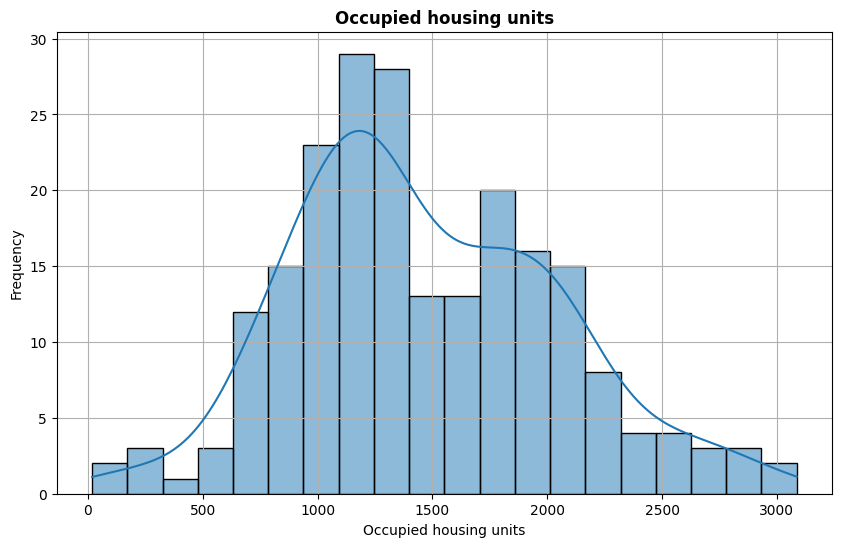

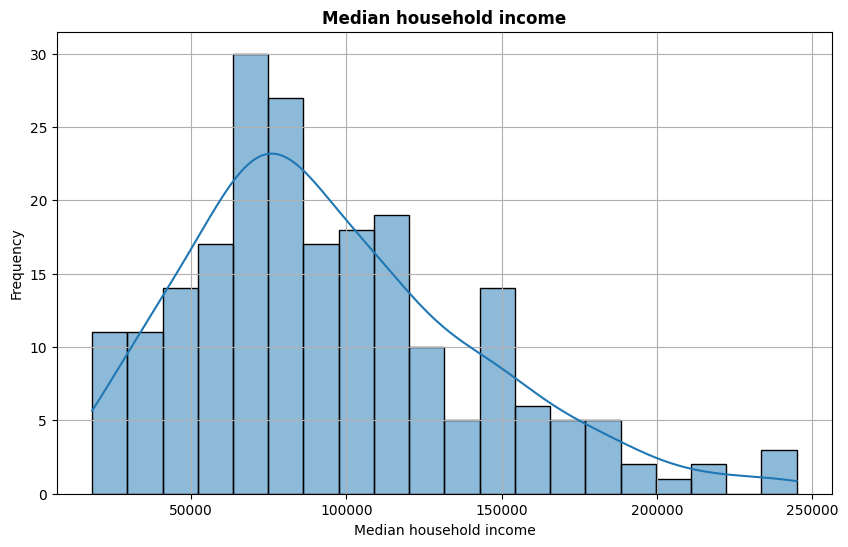

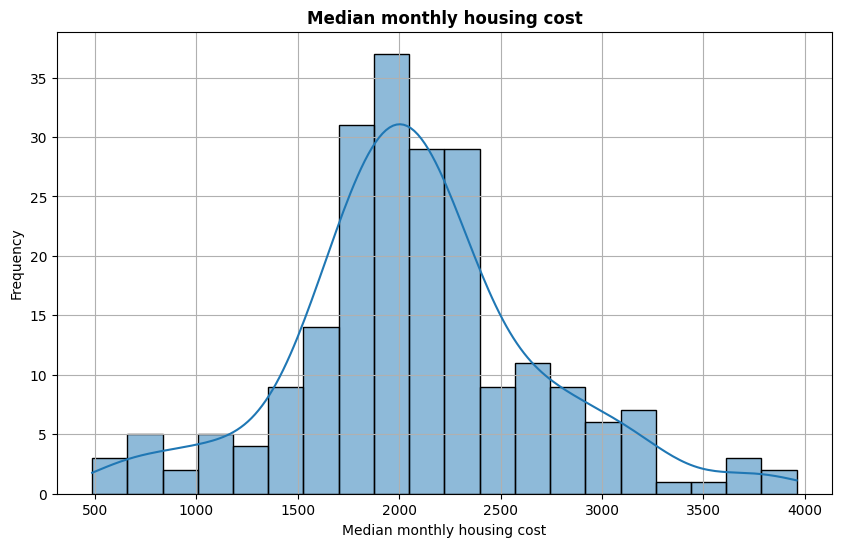

In [80]:
# Get the list of columns to analyze (excluding the 'Tract' column)
columns_to_plot = df_fin_ohu.columns[1:]  # Exclude the 'Tract' column

# Create individual histograms for each relevant column
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_fin_ohu[column], bins=20, kde=True) 
    plt.title(column, fontweight='bold') 
    plt.ylabel('Frequency') 
    plt.grid(True) 
    plt.show() 

In [81]:
df_fin_ohu.dtypes

# Convert the relevant columns to numeric, so the describe() method works as intended
df_fin_ohu['Occupied housing units'] = pd.to_numeric(df_fin_ohu['Occupied housing units'], errors='coerce')
df_fin_ohu['Median household income'] = pd.to_numeric(df_fin_ohu['Median household income'], errors='coerce')
df_fin_ohu['Median monthly housing cost'] = pd.to_numeric(df_fin_ohu['Median monthly housing cost'], errors='coerce')
    
df_fin_ohu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217 entries, 0 to 220
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tract                        217 non-null    object 
 1   Occupied housing units       217 non-null    float64
 2   Median household income      217 non-null    float64
 3   Median monthly housing cost  217 non-null    float64
dtypes: float64(3), object(1)
memory usage: 8.5+ KB


/tmp/ipykernel_17613/3541464401.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fin_ohu['Occupied housing units'] = pd.to_numeric(df_fin_ohu['Occupied housing units'], errors='coerce')
/tmp/ipykernel_17613/3541464401.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fin_ohu['Median household income'] = pd.to_numeric(df_fin_ohu['Median household income'], errors='coerce')
/tmp/ipykernel_17613/3541464401.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [82]:
# display summary statistics
summary_stats = df_fin_ohu.describe()
summary_stats

,Occupied housing units,Median household income,Median monthly housing cost
count,217.000000,217.000000,217.000000
mean,1464.262673,94775.304147,2082.843318
std,577.506638,45974.185719,604.597481
min,18.000000,18125.000000,486.000000
25%,1061.000000,63884.000000,1759.000000
50%,1358.000000,84955.000000,2043.000000
75%,1879.000000,118750.000000,2344.000000
max,3086.000000,245000.000000,3960.000000


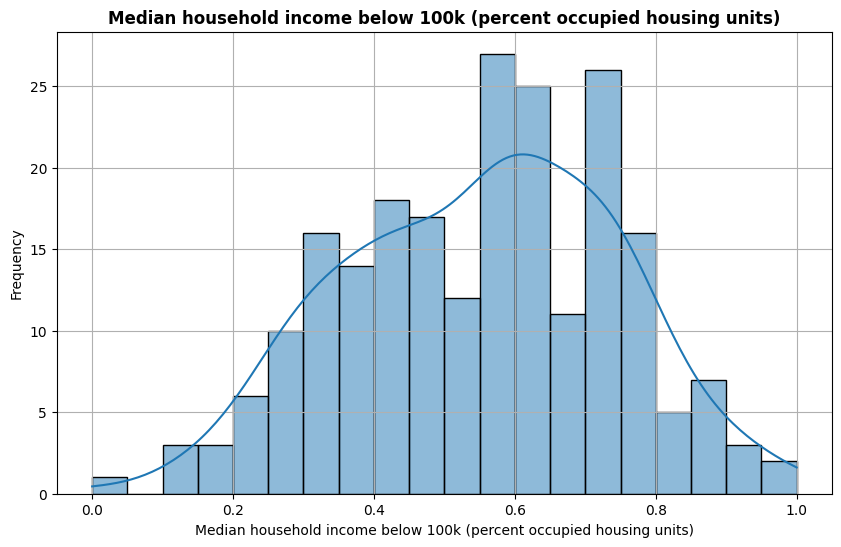

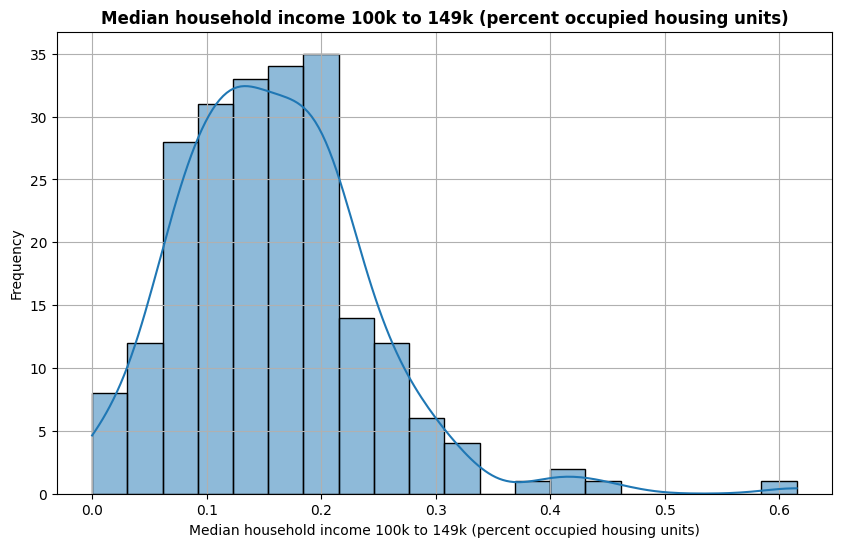

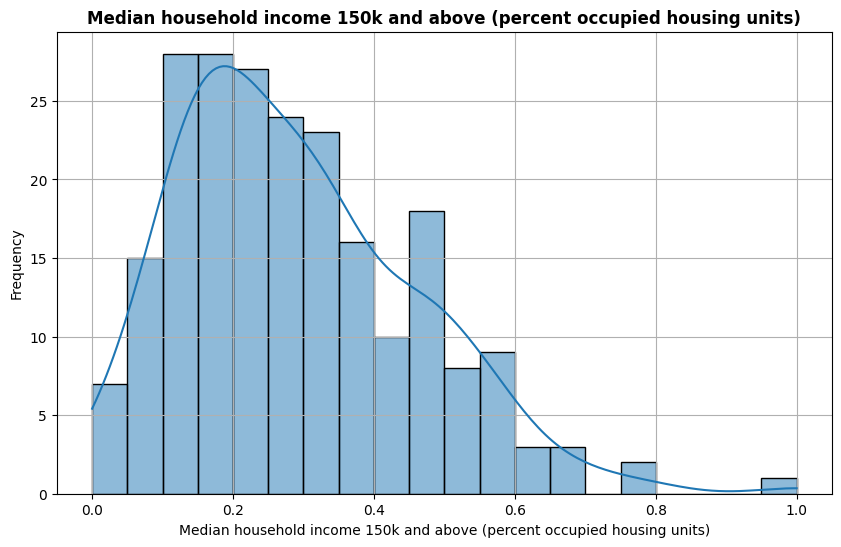

In [83]:
# Get the list of columns to analyze (excluding the 'Tract' column)
columns_to_plot = df_fin_poh.columns[1:]  # Exclude the 'Tract' column

# Create individual histograms for each relevant column
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_fin_poh[column], bins=20, kde=True) 
    plt.title(column, fontweight='bold') 
    plt.ylabel('Frequency') 
    plt.grid(True) 
    plt.show() 

In [84]:
df_fin_poh.dtypes

# Convert the relevant columns to numeric, so the describe() method works as intended
df_fin_poh['Median household income below 100k (percent occupied housing units)'] = pd.to_numeric(df_fin_poh['Median household income below 100k (percent occupied housing units)'], errors='coerce')
df_fin_poh['Median household income 100k to 149k (percent occupied housing units)'] = pd.to_numeric(df_fin_poh['Median household income 100k to 149k (percent occupied housing units)'], errors='coerce')
df_fin_poh['Median household income 150k and above (percent occupied housing units)'] = pd.to_numeric(df_fin_poh['Median household income 150k and above (percent occupied housing units)'], errors='coerce')
    
df_fin_poh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 4 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Tract                                                                    222 non-null    object 
 1   Median household income below 100k (percent occupied housing units)      222 non-null    float64
 2   Median household income 100k to 149k (percent occupied housing units)    222 non-null    float64
 3   Median household income 150k and above (percent occupied housing units)  222 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.1+ KB


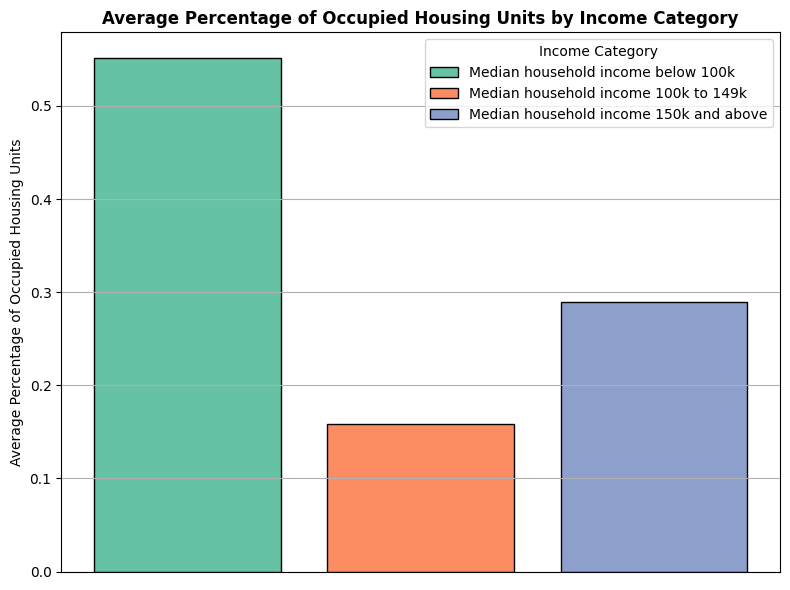

In [85]:
# Calculate the mean for each income category
means = df_fin_poh.iloc[:, 1:].mean()
clean_column_names = [col.replace(' (percent occupied housing units)', '') for col in means.index]

# Set up the plot
plt.figure(figsize=(8, 6))

# Create the bar plot with different colors for each category
bars = plt.bar(range(len(means)), means.values, color=sns.color_palette("Set2", len(means)), edgecolor="black")

# Add labels to the legend and position it to the right of the plot
plt.legend(bars, clean_column_names, title='Income Category')

# Remove x-axis labels and ticks
plt.xticks([])

# Add y-axis label and title
plt.ylabel('Average Percentage of Occupied Housing Units') 
plt.title('Average Percentage of Occupied Housing Units by Income Category', fontweight='bold')

# Show the plot
plt.tight_layout()  # Adjust layout to make space for the legend
plt.grid(True)
plt.show()

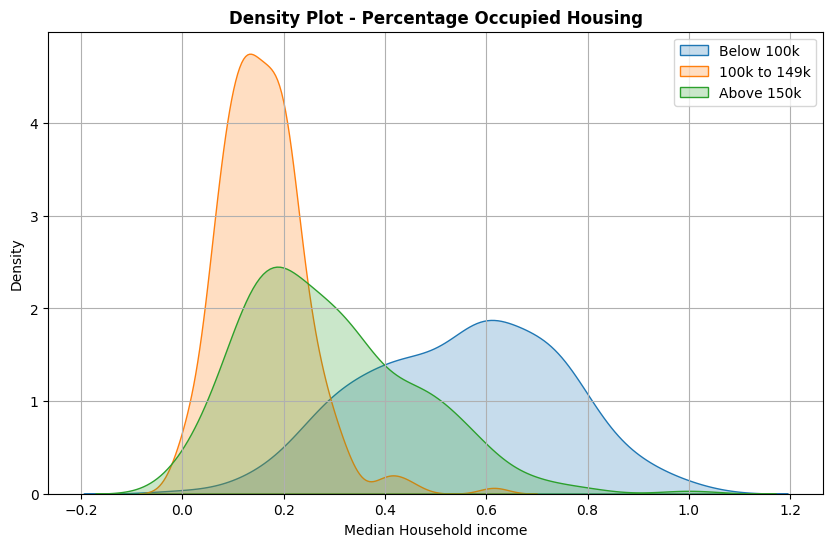

In [86]:
# Density Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df_fin_poh['Median household income below 100k (percent occupied housing units)'], label='Below 100k', fill=True)
sns.kdeplot(df_fin_poh['Median household income 100k to 149k (percent occupied housing units)'], label='100k to 149k', fill=True)
sns.kdeplot(df_fin_poh['Median household income 150k and above (percent occupied housing units)'], label='Above 150k', fill=True)

plt.title('Density Plot - Percentage Occupied Housing', fontweight='bold')
plt.xlabel('Median Household income')
plt.legend()
plt.grid(True)
plt.show()

In [87]:
summary_stats = df_fin_poh.describe()
summary_stats

,Median household income below 100k (percent occupied housing units),Median household income 100k to 149k (percent occupied housing units),Median household income 150k and above (percent occupied housing units)
count,222.000000,222.000000,222.000000
mean,0.551423,0.158734,0.289811
std,0.192079,0.083872,0.169216
min,0.000000,0.000000,0.000000
25%,0.404500,0.102000,0.163250
50%,0.573500,0.153000,0.268000
75%,0.702000,0.207000,0.390750
max,1.000000,0.615000,1.000000


# Read in a third table from US Census - 'Total Population'

In [88]:
df_pop = pd.read_excel("Total_Population_ACSDT5Y2022.B01003.xlsx", sheet_name="Data")
df_pop.to_csv("Total_Population_ACSDT5Y2022.B01003.xlsx.csv", index=False)
df_pop.head()

,Unnamed: 0,Census Tract 1.01; Suffolk County; Massachusetts,Unnamed: 2,Census Tract 1.02; Suffolk County; Massachusetts,Unnamed: 4,Census Tract 2.01; Suffolk County; Massachusetts,Unnamed: 6,Census Tract 2.02; Suffolk County; Massachusetts,Unnamed: 8,Census Tract 3.01; Suffolk County; Massachusetts,Unnamed: 10,Census Tract 3.02; Suffolk County; Massachusetts,Unnamed: 12,Census Tract 4.01; Suffolk County; Massachusetts,Unnamed: 14,Census Tract 4.02; Suffolk County; Massachusetts,Unnamed: 16,Census Tract 5.02; Suffolk County; Massachusetts,Unnamed: 18,Census Tract 5.03; Suffolk County; Massachusetts,Unnamed: 20,Census Tract 5.05; Suffolk County; Massachusetts,Unnamed: 22,Census Tract 5.06; Suffolk County; Massachusetts,Unnamed: 24,Census Tract 6.01; Suffolk County; Massachusetts,Unnamed: 26,Census Tract 6.03; Suffolk County; Massachusetts,Unnamed: 28,Census Tract 6.04; Suffolk County; Massachusetts,Unnamed: 30,Census Tract 7.01; Suffolk County; Massachusetts,Unnamed: 32,Census Tract 7.03; Suffolk County; Massachusetts,Unnamed: 34,Census Tract 7.04; Suffolk County; Massachusetts,Unnamed: 36,Census Tract 8.04; Suffolk County; Massachusetts,Unnamed: 38,Census Tract 8.05; Suffolk County; Massachusetts,Unnamed: 40,Census Tract 8.06; Suffolk County; Massachusetts,Unnamed: 42,Census Tract 8.07; Suffolk County; Massachusetts,Unnamed: 44,Census Tract 101.03; Suffolk County; Massachusetts,Unnamed: 46,Census Tract 101.04; Suffolk County; Massachusetts,Unnamed: 48,Census Tract 102.04; Suffolk County; Massachusetts,Unnamed: 50,Census Tract 102.05; Suffolk County; Massachusetts,Unnamed: 52,Census Tract 102.06; Suffolk County; Massachusetts,Unnamed: 54,Census Tract 103; Suffolk County; Massachusetts,Unnamed: 56,Census Tract 104.03; Suffolk County; Massachusetts,Unnamed: 58,Census Tract 104.04; Suffolk County; Massachusetts,Unnamed: 60,Census Tract 104.05; Suffolk County; Massachusetts,Unnamed: 62,Census Tract 104.08; Suffolk County; Massachusetts,Unnamed: 64,Census Tract 105; Suffolk County; Massachusetts,Unnamed: 66,Census Tract 106; Suffolk County; Massachusetts,Unnamed: 68,Census Tract 107.01; Suffolk County; Massachusetts,Unnamed: 70,Census Tract 107.02; Suffolk County; Massachusetts,Unnamed: 72,Census Tract 108.01; Suffolk County; Massachusetts,Unnamed: 74,Census Tract 108.02; Suffolk County; Massachusetts,Unnamed: 76,Census Tract 201.01; Suffolk County; Massachusetts,Unnamed: 78,Census Tract 202; Suffolk County; Massachusetts,Unnamed: 80,Census Tract 203.01; Suffolk County; Massachusetts,Unnamed: 82,Census Tract 203.02; Suffolk County; Massachusetts,Unnamed: 84,Census Tract 203.04; Suffolk County; Massachusetts,Unnamed: 86,Census Tract 203.05; Suffolk County; Massachusetts,Unnamed: 88,Census Tract 301; Suffolk County; Massachusetts,Unnamed: 90,Census Tract 302; Suffolk County; Massachusetts,Unnamed: 92,Census Tract 303.01; Suffolk County; Massachusetts,Unnamed: 94,Census Tract 303.02; Suffolk County; Massachusetts,Unnamed: 96,Census Tract 304; Suffolk County; Massachusetts,Unnamed: 98,Census Tract 305; Suffolk County; Massachusetts,Unnamed: 100,Census Tract 401; Suffolk County; Massachusetts,Unnamed: 102,Census Tract 402; Suffolk County; Massachusetts,Unnamed: 104,Census Tract 403; Suffolk County; Massachusetts,Unnamed: 106,Census Tract 404.01; Suffolk County; Massachusetts,Unnamed: 108,Census Tract 406; Suffolk County; Massachusetts,Unnamed: 110,Census Tract 408.01; Suffolk County; Massachusetts,Unnamed: 112,Census Tract 501.01; Suffolk County; Massachusetts,Unnamed: 114,Census Tract 502; Suffolk County; Massachusetts,Unnamed: 116,Census Tract 503; Suffolk County; Massachusetts,Unnamed: 118,Census Tract 504; Suffolk County; Massachusetts,Unnamed: 120,Census Tract 505; Suffolk County; Massachusetts,Unnamed: 122,Census Tract 506; Suffolk County; Massachusetts,Unnamed: 124,Census Tract 507; Suffolk County; Massachusetts,Unnamed: 126,Census Tract 509.01; Suffolk County; Massachusetts,Unnamed: 128,Census Tract 510; Suffolk County; Massachus

In [89]:
# transpose the data to change features to columns and put tracts as rows
# delate the 'Unnamed: 0' column to prevent a transpose issue that was encountered
df_pop.rename(columns={'Unnamed: 0': ''}, inplace=True)
df_pop = df_pop.T
df_pop.head()

,0,1
,Label,Total
Census Tract 1.01; Suffolk County; Massachusetts,Estimate,"1,734"
Unnamed: 2,Margin of Error,±384
Census Tract 1.02; Suffolk County; Massachusetts,Estimate,"3,979"
Unnamed: 4,Margin of Error,±815


In [90]:
# set row 1 to column names and drop row 1
df_pop.columns = df_pop.iloc[0]
df_pop = df_pop.drop(df_pop.index[0])
df_pop.head()

,Label,Total
Census Tract 1.01; Suffolk County; Massachusetts,Estimate,"1,734"
Unnamed: 2,Margin of Error,±384
Census Tract 1.02; Suffolk County; Massachusetts,Estimate,"3,979"
Unnamed: 4,Margin of Error,±815
Census Tract 2.01; Suffolk County; Massachusetts,Estimate,"4,375"


In [91]:
# make indices the first column to preserve tract data and re-set
df_pop['Tract'] = df_pop.index
df_pop.insert(0, 'Tract', df_pop.pop('Tract')) # place tract in first column
df_pop.reset_index(drop=True, inplace=True) # reset indices 
df_pop.rename_axis("Index", inplace=True)
df_pop.head()

,Tract,Label,Total
Index,,,
0,Census Tract 1.01; Suffolk County; Massachusetts,Estimate,"1,734"
1,Unnamed: 2,Margin of Error,±384
2,Census Tract 1.02; Suffolk County; Massachusetts,Estimate,"3,979"
3,Unnamed: 4,Margin of Error,±815
4,Census Tract 2.01; Suffolk County; Massachusetts,Estimate,"4,375"


In [92]:
# rename 'Total' column to denote population
# remove 'Margin of Error' row and drop 'Label' column
df_pop = df_pop.rename(columns={"Total" : "Total Population"})
df_pop = df_pop[df_pop["Label"] == "Estimate"]
df_pop = df_pop.drop(columns=['Label'])
df_pop

,Tract,Total Population
Index,,
0,Census Tract 1.01; Suffolk County; Massachusetts,"1,734"
2,Census Tract 1.02; Suffolk County; Massachusetts,"3,979"
4,Census Tract 2.01; Suffolk County; Massachusetts,"4,375"
6,Census Tract 2.02; Suffolk County; Massachusetts,"3,892"
8,Census Tract 3.01; Suffolk County; Massachusetts,"2,719"
...,...,...
460,Census Tract 9816; Suffolk County; Massachusetts,0
462,Census Tract 9817; Suffolk County; Massachusetts,0
464,Census Tract 9818; Suffolk County; Massachusetts,46


In [93]:
# remove words from Tract values to only keep the Tract number (for later merging)
remove_words = r'Census Tract |; Suffolk County; Massachusetts'
df_pop.loc[:,'Tract'] = df_pop['Tract'].str.replace(remove_words, '', regex=True)

In [94]:
# convert population column to integers
df_pop['Total Population'] = df_pop['Total Population'].replace(',', '', regex=True).apply(int)
df_pop['Total Population'].dtypes

dtype('int64')

In [95]:
# convert 0s to NaN values, 0 population does not make sense
df_pop['Total Population'] = np.where(df_pop['Total Population'] == 0, np.nan, df_pop['Total Population'])
df_pop

,Tract,Total Population
Index,,
0,1.01,1734.0
2,1.02,3979.0
4,2.01,4375.0
6,2.02,3892.0
8,3.01,2719.0
...,...,...
460,9816,NaN
462,9817,NaN
464,9818,46.0


In [96]:
# check for null values
df_pop.isna().sum()


Tract               0
Total Population    8
dtype: int64

In [97]:
# show null values
df_pop[df_pop['Total Population'].isna()]

,Tract,Total Population
Index,,
162,612.02,NaN
450,9812.01,NaN
456,9815.01,NaN
458,9815.02,NaN
460,9816,NaN
462,9817,NaN
466,9819,NaN
468,9901.01,NaN


In [98]:
# drop 0 population rows and reset indices, check for NaN vals again
df_pop = df_pop.dropna()
df_pop = df_pop.reset_index(drop=True)
df_pop.isna().sum()


Tract               0
Total Population    0
dtype: int64

In [99]:
# display final df
df_pop

,Tract,Total Population
0,1.01,1734.0
1,1.02,3979.0
2,2.01,4375.0
3,2.02,3892.0
4,3.01,2719.0
...,...,...
222,9810,30.0
223,9811,91.0
224,9812.02,109.0
225,9813,23.0


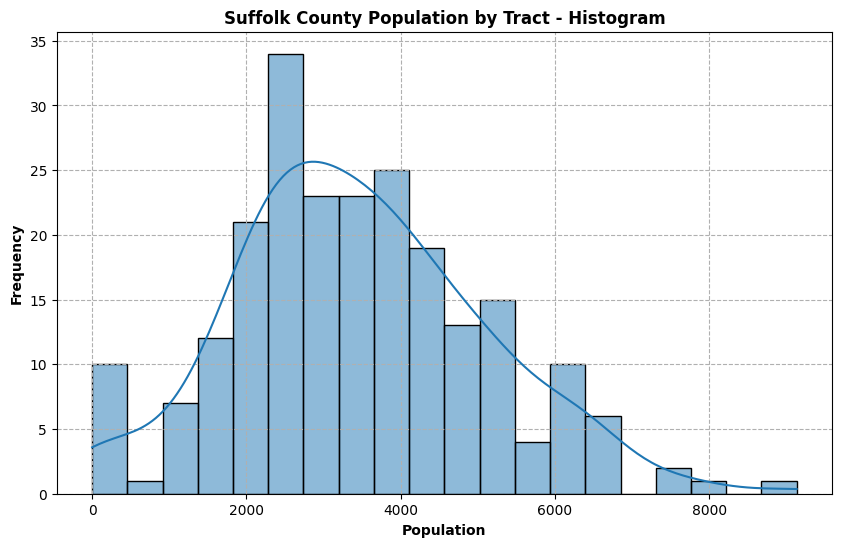

In [100]:
plt.figure(figsize=(10,6))
sns.histplot(df_pop['Total Population'], bins=20, kde=True) 
plt.title('Suffolk County Population by Tract - Histogram', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.xlabel('Population', fontweight='bold') 
plt.grid(True, linestyle="--")
plt.show()


In [101]:
df_pop['Total Population'].describe()

count     227.000000
mean     3460.101322
std      1634.879613
min         1.000000
25%      2351.500000
50%      3292.000000
75%      4449.500000
max      9131.000000
Name: Total Population, dtype: float64

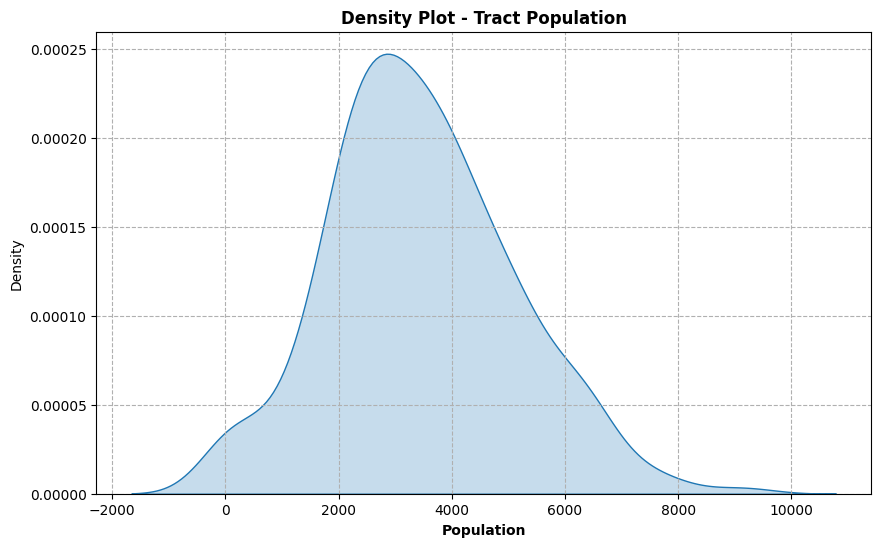

In [102]:
# Density Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df_pop['Total Population'], label='Tract Population', fill=True)
plt.title('Density Plot - Tract Population', fontweight='bold')
plt.xlabel('Population', fontweight='bold')
plt.grid(True, linestyle="--")
plt.show()

In [103]:
df_emp

,Tract,Metric,Population 16 years and over,Below poverty level,At or above the poverty level,With any disability,Population 25 to 64 years,Less than high school graduate,Bachelor's degree or higher
0,1.01,Total,"1,532",196,"1,206",47,"1,069",4,878
1,1.01,Labor Force Participation Rate,69.0%,32.1%,81.8%,83.0%,74.0%,100.0%,70.7%
2,1.01,Employment/Population Ratio,65.5%,15.8%,80.1%,83.0%,70.8%,100.0%,70.7%
3,1.01,Unemployment rate,5.0%,50.8%,2.1%,0.0%,4.3%,0.0%,0.0%
4,1.02,Total,"3,637",622,"2,270",274,"2,568",308,"1,623"
...,...,...,...,...,...,...,...,...,...
935,9819,Unemployment rate,-,-,-,-,-,-,-
936,9901.01,Total,0,0,0,0,0,0,0
937,9901.01,Labor Force Participation Rate,-,-,-,-,-,-,-
938,9901.01,Employment/Population Ratio,-,-,-,-,-,-,-


In [104]:
df_unemp_filt

,Tract,At or above the poverty level (Unemployment Rate),Population 25 to 64 years (Unemployment Rate),Bachelors degree or higher (Unemployment Rate)
0,1.01,0.021,0.043,0.000
1,1.02,0.017,0.027,0.000
2,2.01,0.046,0.052,0.048
3,2.02,0.013,0.026,0.014
4,3.01,0.009,0.011,0.014
...,...,...,...,...
209,1803.01,0.026,0.006,0.009
210,1804,0.039,0.038,0.012
211,1805,0.010,0.012,0.000
212,9801.01,0.280,0.635,1.000


In [105]:
df_fin_ohu

,Tract,Occupied housing units,Median household income,Median monthly housing cost
0,1.01,570.0,135156.0,2376.0
1,1.02,1551.0,84044.0,1968.0
2,2.01,1891.0,111477.0,2610.0
3,2.02,1525.0,84792.0,2095.0
4,3.01,1189.0,133051.0,2485.0
...,...,...,...,...
214,1803.01,1188.0,124167.0,2314.0
215,1804,841.0,115679.0,1928.0
216,1805,1925.0,102214.0,1997.0
217,9809,26.0,108750.0,2250.0


In [106]:
df_fin_poh

,Tract,Median household income below 100k (percent occupied housing units),Median household income 100k to 149k (percent occupied housing units),Median household income 150k and above (percent occupied housing units)
0,1.01,0.231,0.404,0.367
1,1.02,0.583,0.113,0.303
2,2.01,0.468,0.267,0.266
3,2.02,0.534,0.138,0.329
4,3.01,0.280,0.452,0.269
...,...,...,...,...
217,9809,0.192,0.615,0.192
218,9810,1.000,0.000,0.000
219,9811,1.000,0.000,0.000
220,9813,0.000,0.000,1.000


In [107]:
df_pop

,Tract,Total Population
0,1.01,1734.0
1,1.02,3979.0
2,2.01,4375.0
3,2.02,3892.0
4,3.01,2719.0
...,...,...
222,9810,30.0
223,9811,91.0
224,9812.02,109.0
225,9813,23.0


# Merge the Cleaned Data Frames on the 'Tract' Column

In [108]:
# perform outer merge, keeping all rows from each df and filling NaN for missing matches
df_census_outer = pd.merge(df_unemp_filt, df_fin_ohu, on='Tract', how='outer')
df_census_outer = pd.merge(df_census_outer, df_fin_poh, on='Tract', how='outer')
df_census_outer = pd.merge(df_census_outer, df_pop, on='Tract', how='outer')
df_census_outer

,Tract,At or above the poverty level (Unemployment Rate),Population 25 to 64 years (Unemployment Rate),Bachelors degree or higher (Unemployment Rate),Occupied housing units,Median household income,Median monthly housing cost,Median household income below 100k (percent occupied housing units),Median household income 100k to 149k (percent occupied housing units),Median household income 150k and above (percent occupied housing units),Total Population
0,1.01,0.021,0.043,0.0,570.0,135156.0,2376.0,0.231,0.404,0.367,1734.0
1,1.02,0.017,0.027,0.0,1551.0,84044.0,1968.0,0.583,0.113,0.303,3979.0
2,1001,0.111,0.098,0.0,1976.0,41909.0,1745.0,0.787,0.081,0.131,6716.0
3,1002,0.115,0.198,0.0,1041.0,61850.0,1740.0,0.748,0.195,0.058,3567.0
4,1003,0.061,0.090,0.0,1258.0,84500.0,2039.0,0.572,0.214,0.214,3931.0
...,...,...,...,...,...,...,...,...,...,...,...
222,9810,NaN,NaN,NaN,NaN,NaN,NaN,1.000,0.000,0.000,30.0
223,9811,NaN,NaN,NaN,NaN,NaN,NaN,1.000,0.000,0.000,91.0
224,9812.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109.0
225,9813,NaN,NaN,NaN,18.0,245000.0,3750.0,0.000,0.000,1.000,23.0


In [109]:
# perform inner merge, only retainining rows with Tract numbers that are present in each df
df_census = pd.merge(df_unemp_filt, df_fin_ohu, on='Tract', how='inner')
df_census = pd.merge(df_census, df_fin_poh, on='Tract', how='inner')
df_census = pd.merge(df_census, df_pop, on='Tract', how='inner')
df_census

,Tract,At or above the poverty level (Unemployment Rate),Population 25 to 64 years (Unemployment Rate),Bachelors degree or higher (Unemployment Rate),Occupied housing units,Median household income,Median monthly housing cost,Median household income below 100k (percent occupied housing units),Median household income 100k to 149k (percent occupied housing units),Median household income 150k and above (percent occupied housing units),Total Population
0,1.01,0.021,0.043,0.000,570.0,135156.0,2376.0,0.231,0.404,0.367,1734.0
1,1.02,0.017,0.027,0.000,1551.0,84044.0,1968.0,0.583,0.113,0.303,3979.0
2,2.01,0.046,0.052,0.048,1891.0,111477.0,2610.0,0.468,0.267,0.266,4375.0
3,2.02,0.013,0.026,0.014,1525.0,84792.0,2095.0,0.534,0.138,0.329,3892.0
4,3.01,0.009,0.011,0.014,1189.0,133051.0,2485.0,0.280,0.452,0.269,2719.0
...,...,...,...,...,...,...,...,...,...,...,...
205,1801.01,0.087,0.086,0.163,2466.0,92554.0,2084.0,0.555,0.177,0.268,5489.0
206,1802,0.059,0.079,0.140,1908.0,76274.0,1918.0,0.583,0.158,0.258,4548.0
207,1803.01,0.026,0.006,0.009,1188.0,124167.0,2314.0,0.381,0.222,0.396,2888.0
208,1804,0.039,0.038,0.012,841.0,115679.0,1928.0,0.428,0.170,0.402,2075.0


In [110]:
num_removed_tracts = len(df_census_outer) - len(df_census)
print(f"Number of Removed Tracts: {num_removed_tracts}\nNumber of Tracts in Merged Df: {len(df_census)}")

Number of Removed Tracts: 17
Number of Tracts in Merged Df: 210


# Ensure final Df only contains Tracts present in the parquet file

In [111]:
# view tracts form parquet file
tracts

0          301
1          913
2      1105.01
3          305
4          105
        ...   
237     606.03
238     708.02
239     612.02
240     606.01
241     709.01
Name: tract_name, Length: 242, dtype: object

In [112]:
# filter merged df to remove tracts that are not present in the parquet file
df_census = df_census[df_census['Tract'].isin(tracts)]
df_census

,Tract,At or above the poverty level (Unemployment Rate),Population 25 to 64 years (Unemployment Rate),Bachelors degree or higher (Unemployment Rate),Occupied housing units,Median household income,Median monthly housing cost,Median household income below 100k (percent occupied housing units),Median household income 100k to 149k (percent occupied housing units),Median household income 150k and above (percent occupied housing units),Total Population
0,1.01,0.021,0.043,0.000,570.0,135156.0,2376.0,0.231,0.404,0.367,1734.0
1,1.02,0.017,0.027,0.000,1551.0,84044.0,1968.0,0.583,0.113,0.303,3979.0
2,2.01,0.046,0.052,0.048,1891.0,111477.0,2610.0,0.468,0.267,0.266,4375.0
3,2.02,0.013,0.026,0.014,1525.0,84792.0,2095.0,0.534,0.138,0.329,3892.0
4,3.01,0.009,0.011,0.014,1189.0,133051.0,2485.0,0.280,0.452,0.269,2719.0
...,...,...,...,...,...,...,...,...,...,...,...
205,1801.01,0.087,0.086,0.163,2466.0,92554.0,2084.0,0.555,0.177,0.268,5489.0
206,1802,0.059,0.079,0.140,1908.0,76274.0,1918.0,0.583,0.158,0.258,4548.0
207,1803.01,0.026,0.006,0.009,1188.0,124167.0,2314.0,0.381,0.222,0.396,2888.0
208,1804,0.039,0.038,0.012,841.0,115679.0,1928.0,0.428,0.170,0.402,2075.0


In [113]:
# move these columns to end of df
end_columns = ['At or above the poverty level (Unemployment Rate)',
               'Population 25 to 64 years (Unemployment Rate)',
               'Bachelors degree or higher (Unemployment Rate)']

# re-order columns, shift unemployment columns to end of df and place 'Total Population' after 'Tract'
df_census = df_census[['Tract', 'Total Population'] + 
                      [col for col in df_census.columns if col not in ['Tract', 'Total Population'] + end_columns] +
                      end_columns]

# swap location of 'Median household income' and 'Median monthly housing cost'
cols = list(df_census.columns)
col1, col2 = 'Median household income', 'Median monthly housing cost'
idx1, idx2 = cols.index(col1), cols.index(col2)
cols[idx1], cols[idx2] = cols[idx2], cols[idx1]
df_census = df_census[cols]

# display final df
df_census

,Tract,Total Population,Occupied housing units,Median monthly housing cost,Median household income,Median household income below 100k (percent occupied housing units),Median household income 100k to 149k (percent occupied housing units),Median household income 150k and above (percent occupied housing units),At or above the poverty level (Unemployment Rate),Population 25 to 64 years (Unemployment Rate),Bachelors degree or higher (Unemployment Rate)
0,1.01,1734.0,570.0,2376.0,135156.0,0.231,0.404,0.367,0.021,0.043,0.000
1,1.02,3979.0,1551.0,1968.0,84044.0,0.583,0.113,0.303,0.017,0.027,0.000
2,2.01,4375.0,1891.0,2610.0,111477.0,0.468,0.267,0.266,0.046,0.052,0.048
3,2.02,3892.0,1525.0,2095.0,84792.0,0.534,0.138,0.329,0.013,0.026,0.014
4,3.01,2719.0,1189.0,2485.0,133051.0,0.280,0.452,0.269,0.009,0.011,0.014
...,...,...,...,...,...,...,...,...,...,...,...
205,1801.01,5489.0,2466.0,2084.0,92554.0,0.555,0.177,0.268,0.087,0.086,0.163
206,1802,4548.0,1908.0,1918.0,76274.0,0.583,0.158,0.258,0.059,0.079,0.140
207,1803.01,2888.0,1188.0,2314.0,124167.0,0.381,0.222,0.396,0.026,0.006,0.009
208,1804,2075.0,841.0,1928.0,115679.0,0.428,0.170,0.402,0.039,0.038,0.012


# Census Data Cleaning and Merging Complete, next the Census Data will be merged with the Geographical Data